## Задание


Провести разведочный анализ данных, придумать продуктовые и технические гипотезы — какую ценность можете извлечь из данных для организации, которая предоставила данные.


### Импорты и загрузка данных


In [3]:
# Импорты библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Настройки для отображения
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

print("Библиотеки импортированы успешно!")

# Загрузка данных
print("Загружаем данные...")

# Основной датасет с транзакциями
df_transactions = pd.read_parquet('./data/transaction_fraud_data.parquet')

# Данные обменных курсов
df_exchange = pd.read_parquet('./data/historical_currency_exchange.parquet')

print(f"Транзакции загружены: {df_transactions.shape}")
print(f"Курсы валют загружены: {df_exchange.shape}")

Библиотеки импортированы успешно!
Загружаем данные...
Транзакции загружены: (7483766, 23)
Курсы валют загружены: (31, 12)


### Анализ пропущенных данных



1. Общая информация о пропусках:
Всего строк: 7,483,766
Всего столбцов: 23

2. Пропуски по столбцам:
Empty DataFrame
Columns: [Количество_пропусков, Процент_пропусков]
Index: []


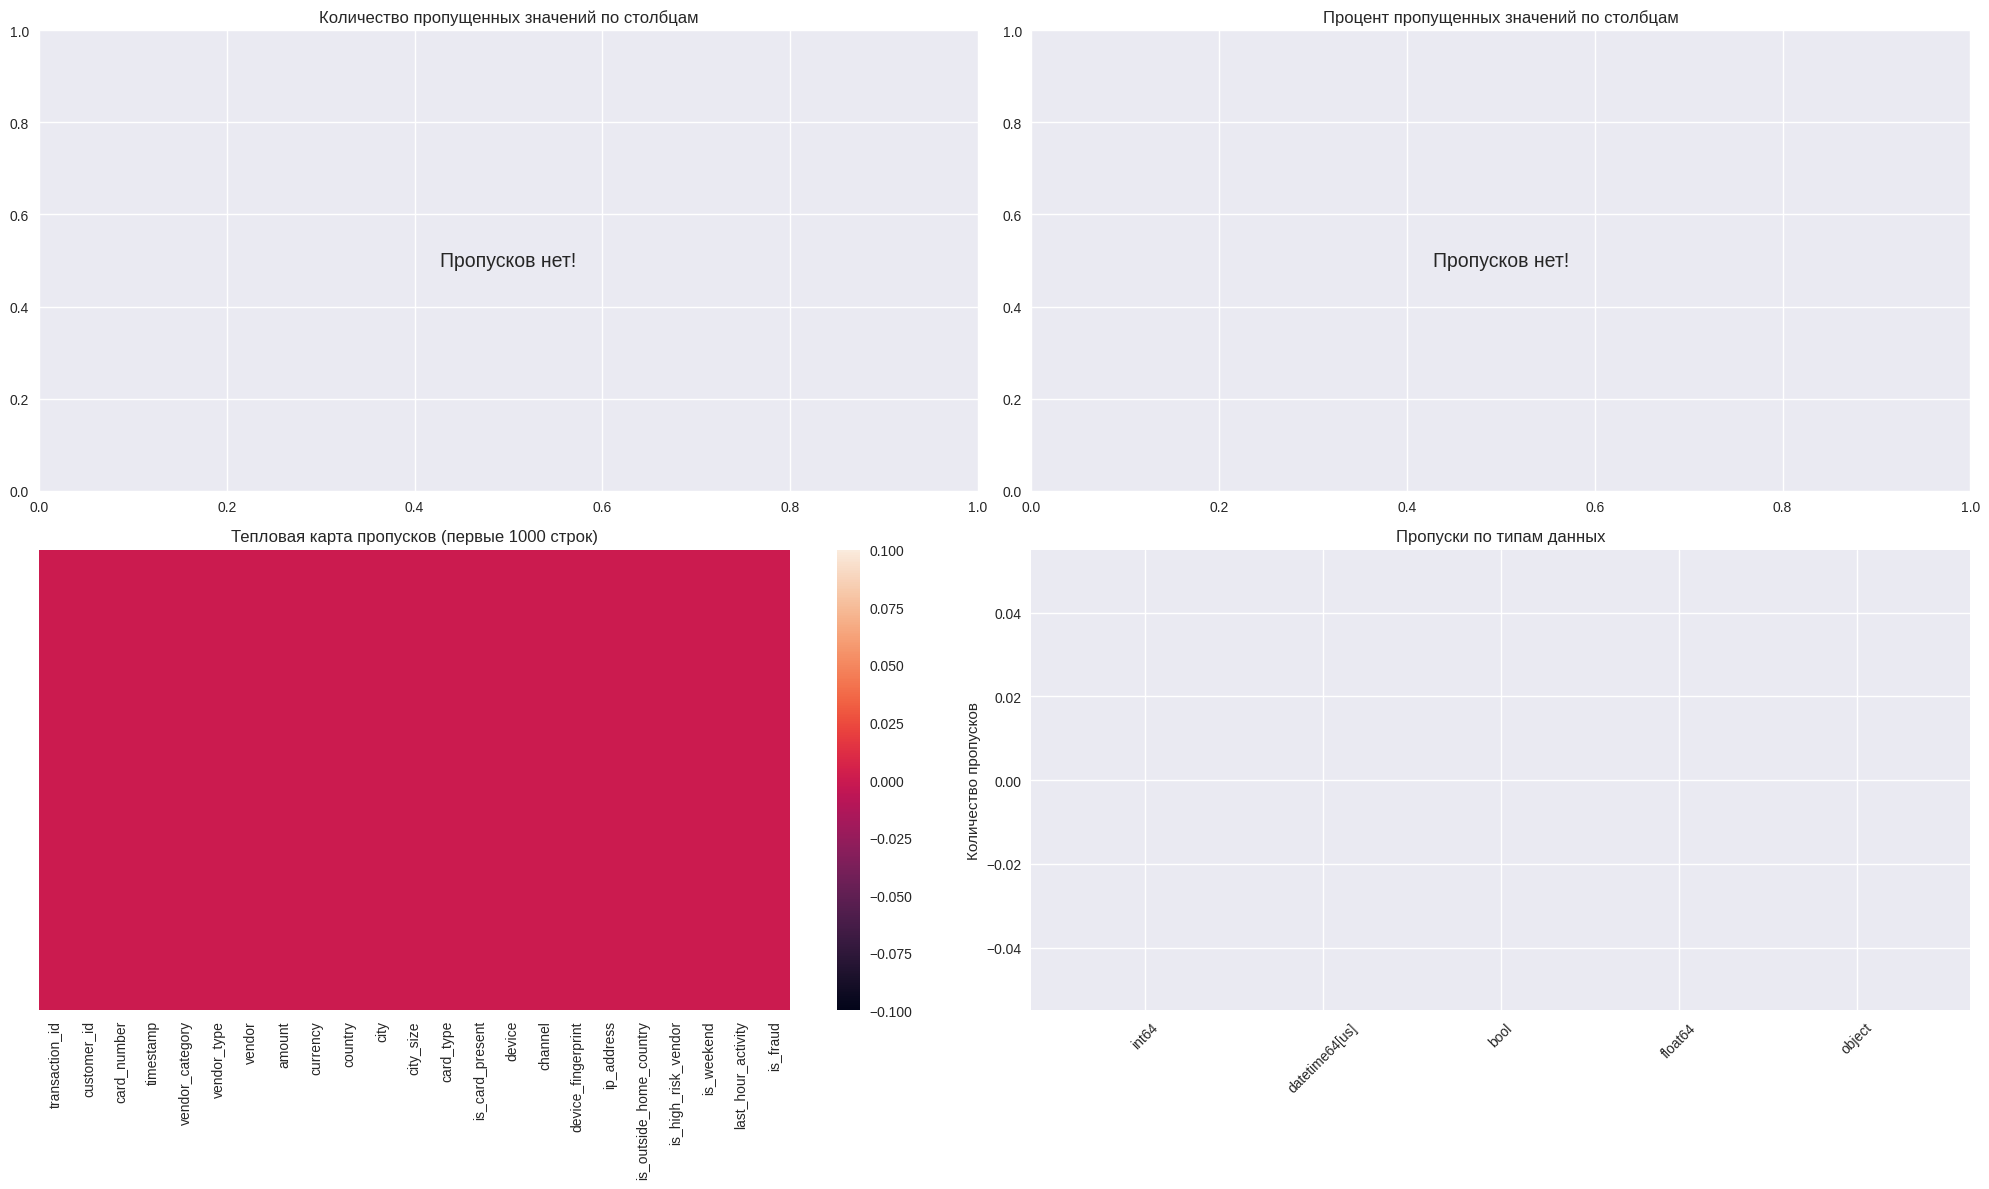


3. Анализ паттернов пропусков:
Строк с полными пропусками: 0
Строк с частичными пропусками: 0

5. Анализ пропусков в контексте мошенничества:

6. Рекомендации по обработке пропусков:
• transaction_id: пропусков нет ✓
• customer_id: пропусков нет ✓
• card_number: пропусков нет ✓
• timestamp: пропусков нет ✓
• vendor_category: пропусков нет ✓
• vendor_type: пропусков нет ✓
• vendor: пропусков нет ✓
• amount: пропусков нет ✓
• currency: пропусков нет ✓
• country: пропусков нет ✓
• city: пропусков нет ✓
• city_size: пропусков нет ✓
• card_type: пропусков нет ✓
• is_card_present: пропусков нет ✓
• device: пропусков нет ✓
• channel: пропусков нет ✓
• device_fingerprint: пропусков нет ✓
• ip_address: пропусков нет ✓
• is_outside_home_country: пропусков нет ✓
• is_high_risk_vendor: пропусков нет ✓
• is_weekend: пропусков нет ✓
• last_hour_activity: пропусков нет ✓
• is_fraud: пропусков нет ✓

7. Анализ пропусков в данных обменных курсов:
Пропуски в данных обменных курсов:
Empty DataFrame
Colu

In [4]:
# 1. Общая информация о пропусках
print("\n1. Общая информация о пропусках:")
print(f"Всего строк: {len(df_transactions):,}")
print(f"Всего столбцов: {len(df_transactions.columns)}")

# Подсчет пропусков по столбцам
missing_data = df_transactions.isnull().sum()
missing_percentage = (missing_data / len(df_transactions)) * 100

missing_info = pd.DataFrame({
    'Количество_пропусков': missing_data,
    'Процент_пропусков': missing_percentage
}).sort_values('Количество_пропусков', ascending=False)

print("\n2. Пропуски по столбцам:")
print(missing_info[missing_info['Количество_пропусков'] > 0])

# 3. Визуализация пропусков
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 12))

# Столбчатая диаграмма пропусков
columns_with_missing = missing_info[missing_info['Количество_пропусков'] > 0]
if len(columns_with_missing) > 0:
    ax1.barh(columns_with_missing.index, columns_with_missing['Количество_пропусков'], color='lightcoral')
    ax1.set_title('Количество пропущенных значений по столбцам')
    ax1.set_xlabel('Количество пропусков')
else:
    ax1.text(0.5, 0.5, 'Пропусков нет!', ha='center', va='center', transform=ax1.transAxes, fontsize=14)
    ax1.set_title('Количество пропущенных значений по столбцам')

# Процент пропусков
if len(columns_with_missing) > 0:
    ax2.barh(columns_with_missing.index, columns_with_missing['Процент_пропусков'], color='lightblue')
    ax2.set_title('Процент пропущенных значений по столбцам')
    ax2.set_xlabel('Процент пропусков (%)')
else:
    ax2.text(0.5, 0.5, 'Пропусков нет!', ha='center', va='center', transform=ax2.transAxes, fontsize=14)
    ax2.set_title('Процент пропущенных значений по столбцам')

# Тепловая карта пропусков (первые 1000 строк для наглядности)
sample_data = df_transactions.head(1000)
missing_matrix = sample_data.isnull()
sns.heatmap(missing_matrix, cbar=True, yticklabels=False, ax=ax3)
ax3.set_title('Тепловая карта пропусков (первые 1000 строк)')

# Анализ пропусков по типам данных
data_types = df_transactions.dtypes
missing_by_type = pd.DataFrame({
    'Тип_данных': data_types,
    'Количество_пропусков': missing_data,
    'Процент_пропусков': missing_percentage
})

missing_by_type_summary = missing_by_type.groupby('Тип_данных').agg({
    'Количество_пропусков': 'sum',
    'Процент_пропусков': 'mean'
}).sort_values('Количество_пропусков', ascending=False)

ax4.bar(missing_by_type_summary.index.astype(str), missing_by_type_summary['Количество_пропусков'], color='lightgreen')
ax4.set_title('Пропуски по типам данных')
ax4.set_ylabel('Количество пропусков')
ax4.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# 4. Анализ паттернов пропусков
print("\n3. Анализ паттернов пропусков:")

# Проверка на полные пропуски строк
complete_missing_rows = df_transactions.isnull().all(axis=1).sum()
print(f"Строк с полными пропусками: {complete_missing_rows:,}")

# Проверка на частичные пропуски строк
partial_missing_rows = df_transactions.isnull().any(axis=1).sum()
print(f"Строк с частичными пропусками: {partial_missing_rows:,}")

# Анализ корреляции пропусков между столбцами
if len(columns_with_missing) > 1:
    missing_corr = df_transactions[columns_with_missing.index].isnull().corr()
    print("\n4. Корреляция пропусков между столбцами:")
    print(missing_corr)

# 5. Анализ пропусков в контексте мошенничества
print("\n5. Анализ пропусков в контексте мошенничества:")

for column in columns_with_missing.index:
    if column != 'is_fraud':  # Исключаем целевую переменную
        fraud_by_missing = df_transactions.groupby(df_transactions[column].isnull())['is_fraud'].agg(['count', 'sum', 'mean'])
        fraud_by_missing.columns = ['Всего_транзакций', 'Мошеннических', 'Процент_мошенничества']
        fraud_by_missing['Процент_мошенничества'] = fraud_by_missing['Процент_мошенничества'] * 100
        
        print(f"\n{column}:")
        print(fraud_by_missing)

# 6. Рекомендации по обработке пропусков
print("\n6. Рекомендации по обработке пропусков:")

for column in df_transactions.columns:
    missing_count = df_transactions[column].isnull().sum()
    missing_pct = (missing_count / len(df_transactions)) * 100
    
    if missing_count > 0:
        data_type = df_transactions[column].dtype
        
        if missing_pct < 5:
            print(f"• {column}: {missing_pct:.2f}% пропусков - можно удалить строки или использовать простую импутацию")
        elif missing_pct < 30:
            print(f"• {column}: {missing_pct:.2f}% пропусков - рекомендуется использовать продвинутые методы импутации")
        else:
            print(f"• {column}: {missing_pct:.2f}% пропусков - критично много, рассмотреть удаление столбца или специальные методы")
        
        if data_type == 'object':
            print(f"  - Тип: категориальный, рекомендуется мода или создание категории 'Unknown'")
        elif data_type in ['int64', 'float64']:
            print(f"  - Тип: числовой, рекомендуется медиана или среднее")
        elif data_type == 'bool':
            print(f"  - Тип: булевый, рекомендуется False как значение по умолчанию")
    else:
        print(f"• {column}: пропусков нет ✓")

# 7. Анализ пропусков в данных обменных курсов
print("\n7. Анализ пропусков в данных обменных курсов:")
exchange_missing = df_exchange.isnull().sum()
exchange_missing_pct = (exchange_missing / len(df_exchange)) * 100

exchange_missing_info = pd.DataFrame({
    'Количество_пропусков': exchange_missing,
    'Процент_пропусков': exchange_missing_pct
})

print("Пропуски в данных обменных курсов:")
print(exchange_missing_info[exchange_missing_info['Количество_пропусков'] > 0])

if exchange_missing_info['Количество_пропусков'].sum() == 0:
    print("✓ В данных обменных курсов пропусков нет")

### Основная информация о данных


In [5]:
print("=== ОСНОВНАЯ ИНФОРМАЦИЯ О ДАННЫХ ===")
print("\n1. Информация о транзакциях:")
print(df_transactions.info())

print("\n2. Первые 5 строк транзакций:")
print(df_transactions.head())

print("\n3. Статистика числовых признаков:")
print(df_transactions.describe())

print("\n4. Информация о курсах валют:")
print(df_exchange.info())
print(df_exchange.head())

=== ОСНОВНАЯ ИНФОРМАЦИЯ О ДАННЫХ ===

1. Информация о транзакциях:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7483766 entries, 0 to 7483765
Data columns (total 23 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   transaction_id           object        
 1   customer_id              object        
 2   card_number              int64         
 3   timestamp                datetime64[us]
 4   vendor_category          object        
 5   vendor_type              object        
 6   vendor                   object        
 7   amount                   float64       
 8   currency                 object        
 9   country                  object        
 10  city                     object        
 11  city_size                object        
 12  card_type                object        
 13  is_card_present          bool          
 14  device                   object        
 15  channel                  object        
 16  devic

### Анализ переменной is_fraud


Всего транзакций: 7,483,766
Мошеннических транзакций: 1,494,719
Легитимных транзакций: 5,989,047
Процент мошенничества: 19.97%


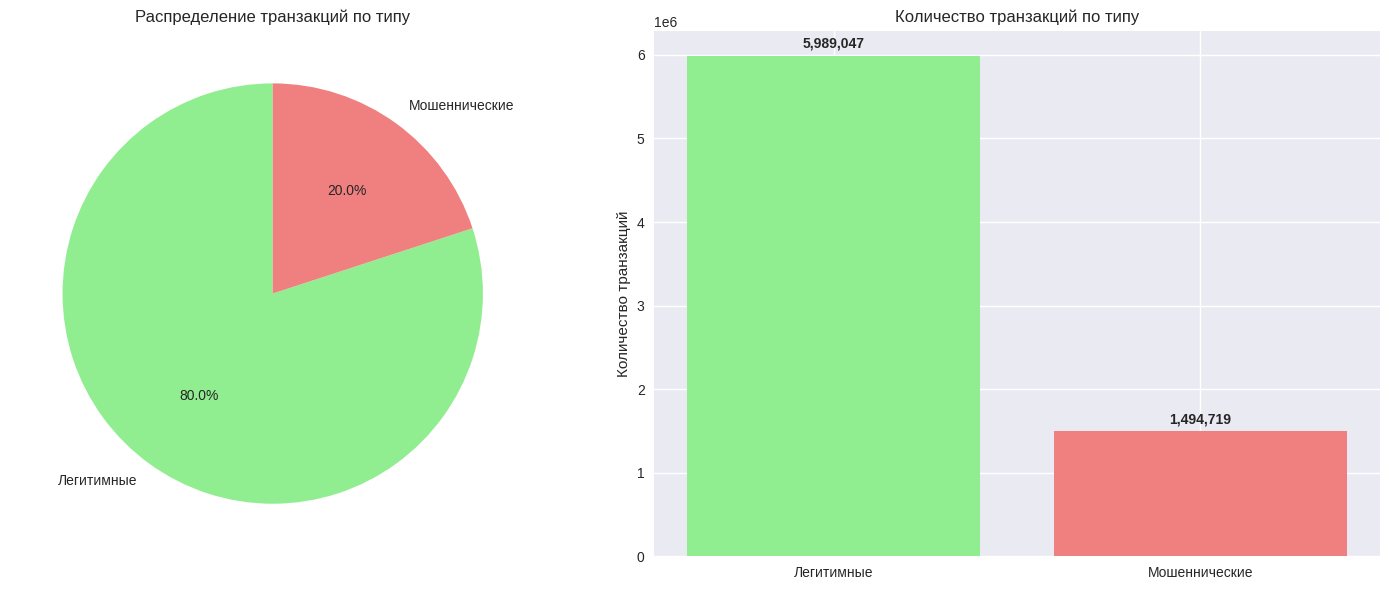

In [6]:
fraud_stats = df_transactions['is_fraud'].value_counts()
fraud_percentage = (fraud_stats[True] / len(df_transactions)) * 100

print(f"Всего транзакций: {len(df_transactions):,}")
print(f"Мошеннических транзакций: {fraud_stats[True]:,}")
print(f"Легитимных транзакций: {fraud_stats[False]:,}")
print(f"Процент мошенничества: {fraud_percentage:.2f}%")

# Визуализация распределения
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Круговая диаграмма
ax1.pie(fraud_stats.values, labels=['Легитимные', 'Мошеннические'], 
        autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'lightcoral'])
ax1.set_title('Распределение транзакций по типу')

# Столбчатая диаграмма
ax2.bar(['Легитимные', 'Мошеннические'], fraud_stats.values, 
        color=['lightgreen', 'lightcoral'])
ax2.set_title('Количество транзакций по типу')
ax2.set_ylabel('Количество транзакций')

for i, v in enumerate(fraud_stats.values):
    ax2.text(i, v + max(fraud_stats.values) * 0.01, f'{v:,}', 
             ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

### Анализ временных паттернов


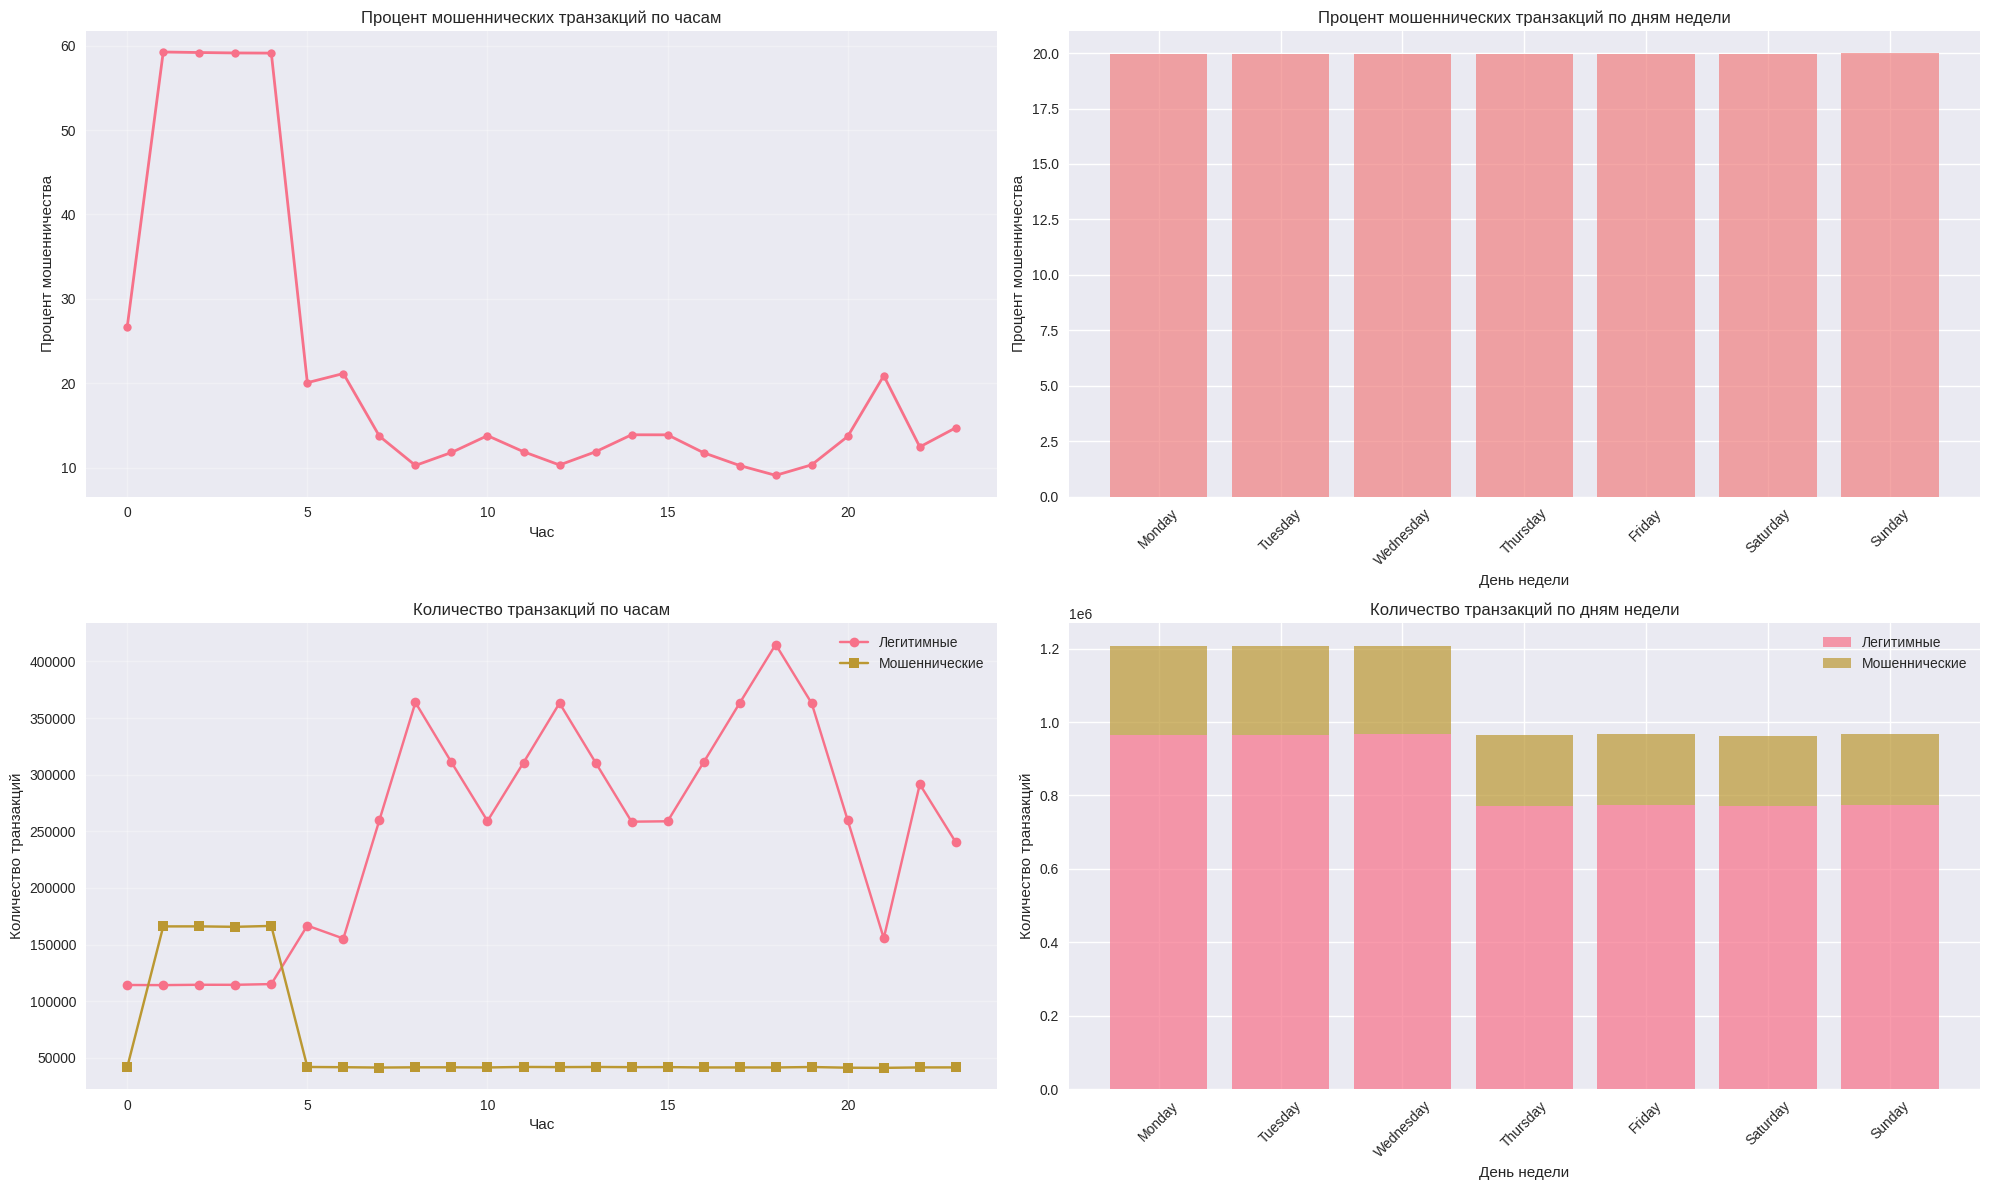

Период данных: с 2024-09-30 по 2024-10-30
Всего дней: 31


In [7]:
# Преобразование timestamp
df_transactions['timestamp'] = pd.to_datetime(df_transactions['timestamp'])
df_transactions['date'] = df_transactions['timestamp'].dt.date
df_transactions['hour'] = df_transactions['timestamp'].dt.hour
df_transactions['day_of_week'] = df_transactions['timestamp'].dt.day_name()
df_transactions['month'] = df_transactions['timestamp'].dt.month

# Анализ по часам
hourly_fraud = df_transactions.groupby(['hour', 'is_fraud']).size().unstack(fill_value=0)
hourly_fraud_rate = hourly_fraud[True] / (hourly_fraud[True] + hourly_fraud[False]) * 100

# Анализ по дням недели
daily_fraud = df_transactions.groupby(['day_of_week', 'is_fraud']).size().unstack(fill_value=0)
daily_fraud_rate = daily_fraud[True] / (daily_fraud[True] + daily_fraud[False]) * 100

# Визуализация
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 12))

# По часам
ax1.plot(hourly_fraud_rate.index, hourly_fraud_rate.values, marker='o', linewidth=2, markersize=6)
ax1.set_title('Процент мошеннических транзакций по часам')
ax1.set_xlabel('Час')
ax1.set_ylabel('Процент мошенничества')
ax1.grid(True, alpha=0.3)

# По дням недели
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_fraud_rate_ordered = daily_fraud_rate.reindex(days_order)
ax2.bar(daily_fraud_rate_ordered.index, daily_fraud_rate_ordered.values, 
        color='lightcoral', alpha=0.7)
ax2.set_title('Процент мошеннических транзакций по дням недели')
ax2.set_xlabel('День недели')
ax2.set_ylabel('Процент мошенничества')
ax2.tick_params(axis='x', rotation=45)

# Общее количество транзакций по часам
ax3.plot(hourly_fraud.index, hourly_fraud[False], label='Легитимные', marker='o')
ax3.plot(hourly_fraud.index, hourly_fraud[True], label='Мошеннические', marker='s')
ax3.set_title('Количество транзакций по часам')
ax3.set_xlabel('Час')
ax3.set_ylabel('Количество транзакций')
ax3.legend()
ax3.grid(True, alpha=0.3)

# Общее количество транзакций по дням недели
daily_total_ordered = daily_fraud.reindex(days_order)
ax4.bar(daily_total_ordered.index, daily_total_ordered[False], label='Легитимные', alpha=0.7)
ax4.bar(daily_total_ordered.index, daily_total_ordered[True], bottom=daily_total_ordered[False], 
        label='Мошеннические', alpha=0.7)
ax4.set_title('Количество транзакций по дням недели')
ax4.set_xlabel('День недели')
ax4.set_ylabel('Количество транзакций')
ax4.legend()
ax4.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

print(f"Период данных: с {df_transactions['date'].min()} по {df_transactions['date'].max()}")
print(f"Всего дней: {(df_transactions['date'].max() - df_transactions['date'].min()).days + 1}")

### Анализ сумм транзакций


Статистика сумм транзакций:
              count           mean            std    min      25%      50%  \
is_fraud                                                                     
False     5989047.0   30242.538284   87656.818774  17.95  368.220   903.51   
True      1494719.0  118773.589871  347542.933086   0.01  295.585  5626.06   

               75%         max  
is_fraud                        
False     14535.93  1240629.47  
True      63556.20  6253152.62  


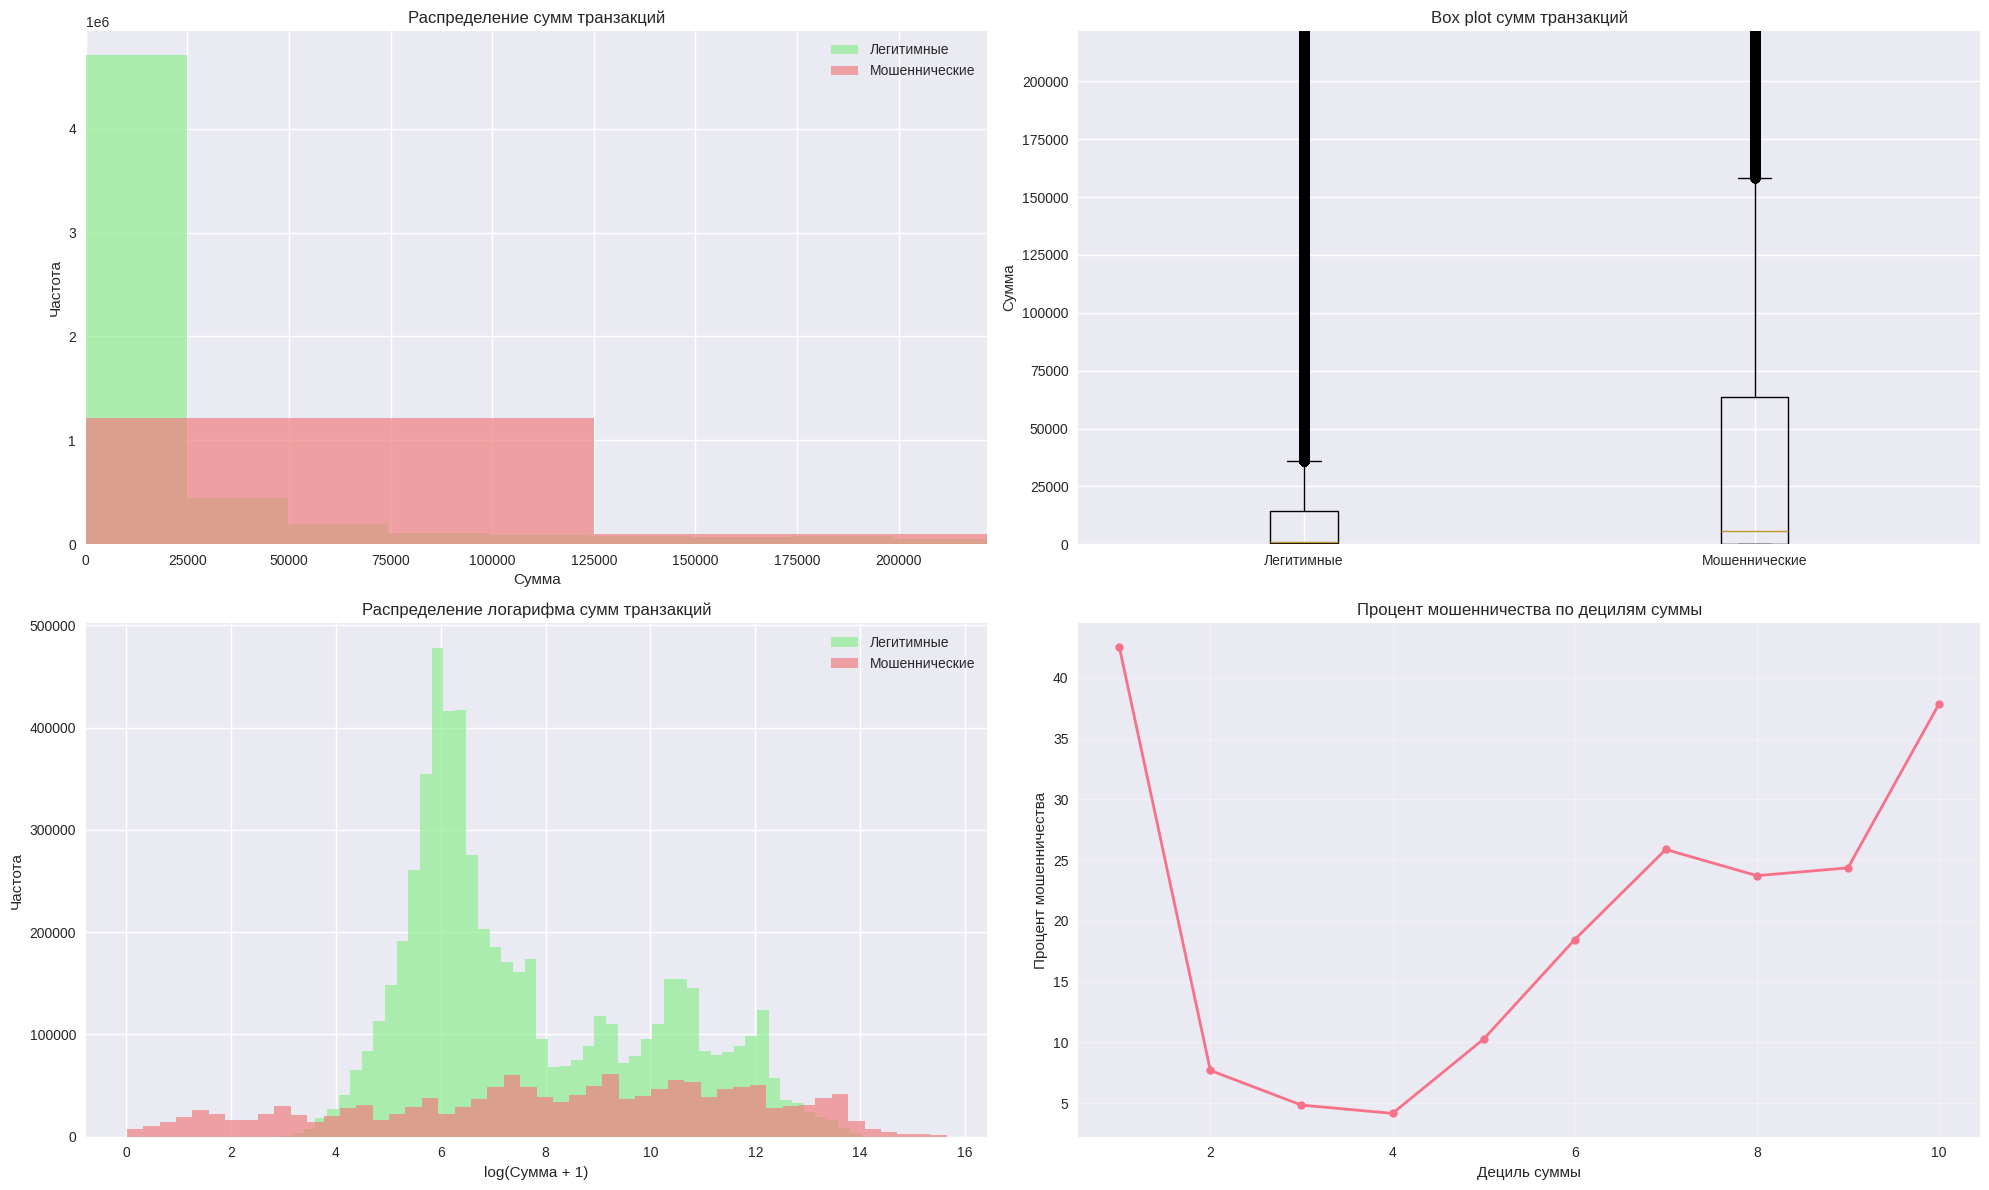


Топ-10 самых крупных транзакций:
             amount currency vendor_category  is_fraud
3170744  6253152.62      NGN          Travel      True
510694   6243513.37      NGN          Travel      True
3295531  6243212.03      NGN          Travel      True
1973827  6227400.98      NGN          Travel      True
2949588  6222909.52      NGN          Travel      True
5283061  6222174.26      NGN          Travel      True
5071905  6207032.30      NGN          Travel      True
6902797  6202390.22      NGN          Travel      True
4624170  6198732.75      NGN          Travel      True
744379   6195898.12      NGN          Travel      True


In [8]:
# Статистика по суммам
amount_stats = df_transactions.groupby('is_fraud')['amount'].describe()
print("Статистика сумм транзакций:")
print(amount_stats)

# Визуализация распределения сумм
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 12))

# Гистограммы сумм
ax1.hist(df_transactions[df_transactions['is_fraud'] == False]['amount'], 
         bins=50, alpha=0.7, label='Легитимные', color='lightgreen')
ax1.hist(df_transactions[df_transactions['is_fraud'] == True]['amount'], 
         bins=50, alpha=0.7, label='Мошеннические', color='lightcoral')
ax1.set_title('Распределение сумм транзакций')
ax1.set_xlabel('Сумма')
ax1.set_ylabel('Частота')
ax1.legend()
ax1.set_xlim(0, df_transactions['amount'].quantile(0.95))

# Box plot
ax2.boxplot([df_transactions[df_transactions['is_fraud'] == False]['amount'],
             df_transactions[df_transactions['is_fraud'] == True]['amount']],
            labels=['Легитимные', 'Мошеннические'])
ax2.set_title('Box plot сумм транзакций')
ax2.set_ylabel('Сумма')
ax2.set_ylim(0, df_transactions['amount'].quantile(0.95))

# Логарифмированное распределение
ax3.hist(np.log1p(df_transactions[df_transactions['is_fraud'] == False]['amount']), 
         bins=50, alpha=0.7, label='Легитимные', color='lightgreen')
ax3.hist(np.log1p(df_transactions[df_transactions['is_fraud'] == True]['amount']), 
         bins=50, alpha=0.7, label='Мошеннические', color='lightcoral')
ax3.set_title('Распределение логарифма сумм транзакций')
ax3.set_xlabel('log(Сумма + 1)')
ax3.set_ylabel('Частота')
ax3.legend()

# Процент мошенничества по квантилям суммы
amount_quantiles = pd.qcut(df_transactions['amount'], q=10, labels=False)
fraud_by_amount = df_transactions.groupby(amount_quantiles)['is_fraud'].mean() * 100
ax4.plot(range(1, 11), fraud_by_amount.values, marker='o', linewidth=2, markersize=6)
ax4.set_title('Процент мошенничества по децилям суммы')
ax4.set_xlabel('Дециль суммы')
ax4.set_ylabel('Процент мошенничества')
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Анализ экстремальных сумм
print(f"\nТоп-10 самых крупных транзакций:")
print(df_transactions.nlargest(10, 'amount')[['amount', 'currency', 'vendor_category', 'is_fraud']])

### Анализ категорий вендоров


Статистика мошенничества по категориям вендоров:
                 Всего_транзакций  Мошеннических  Процент_мошенничества
vendor_category                                                        
Travel                     935790         187477              20.034089
Grocery                    934029         186987              20.019400
Gas                        935401         186829              19.973145
Restaurant                 936178         186951              19.969600
Entertainment              936173         186890              19.963191
Education                  933542         186203              19.945862
Retail                     935883         186613              19.939779
Healthcare                 936770         186769              19.937551


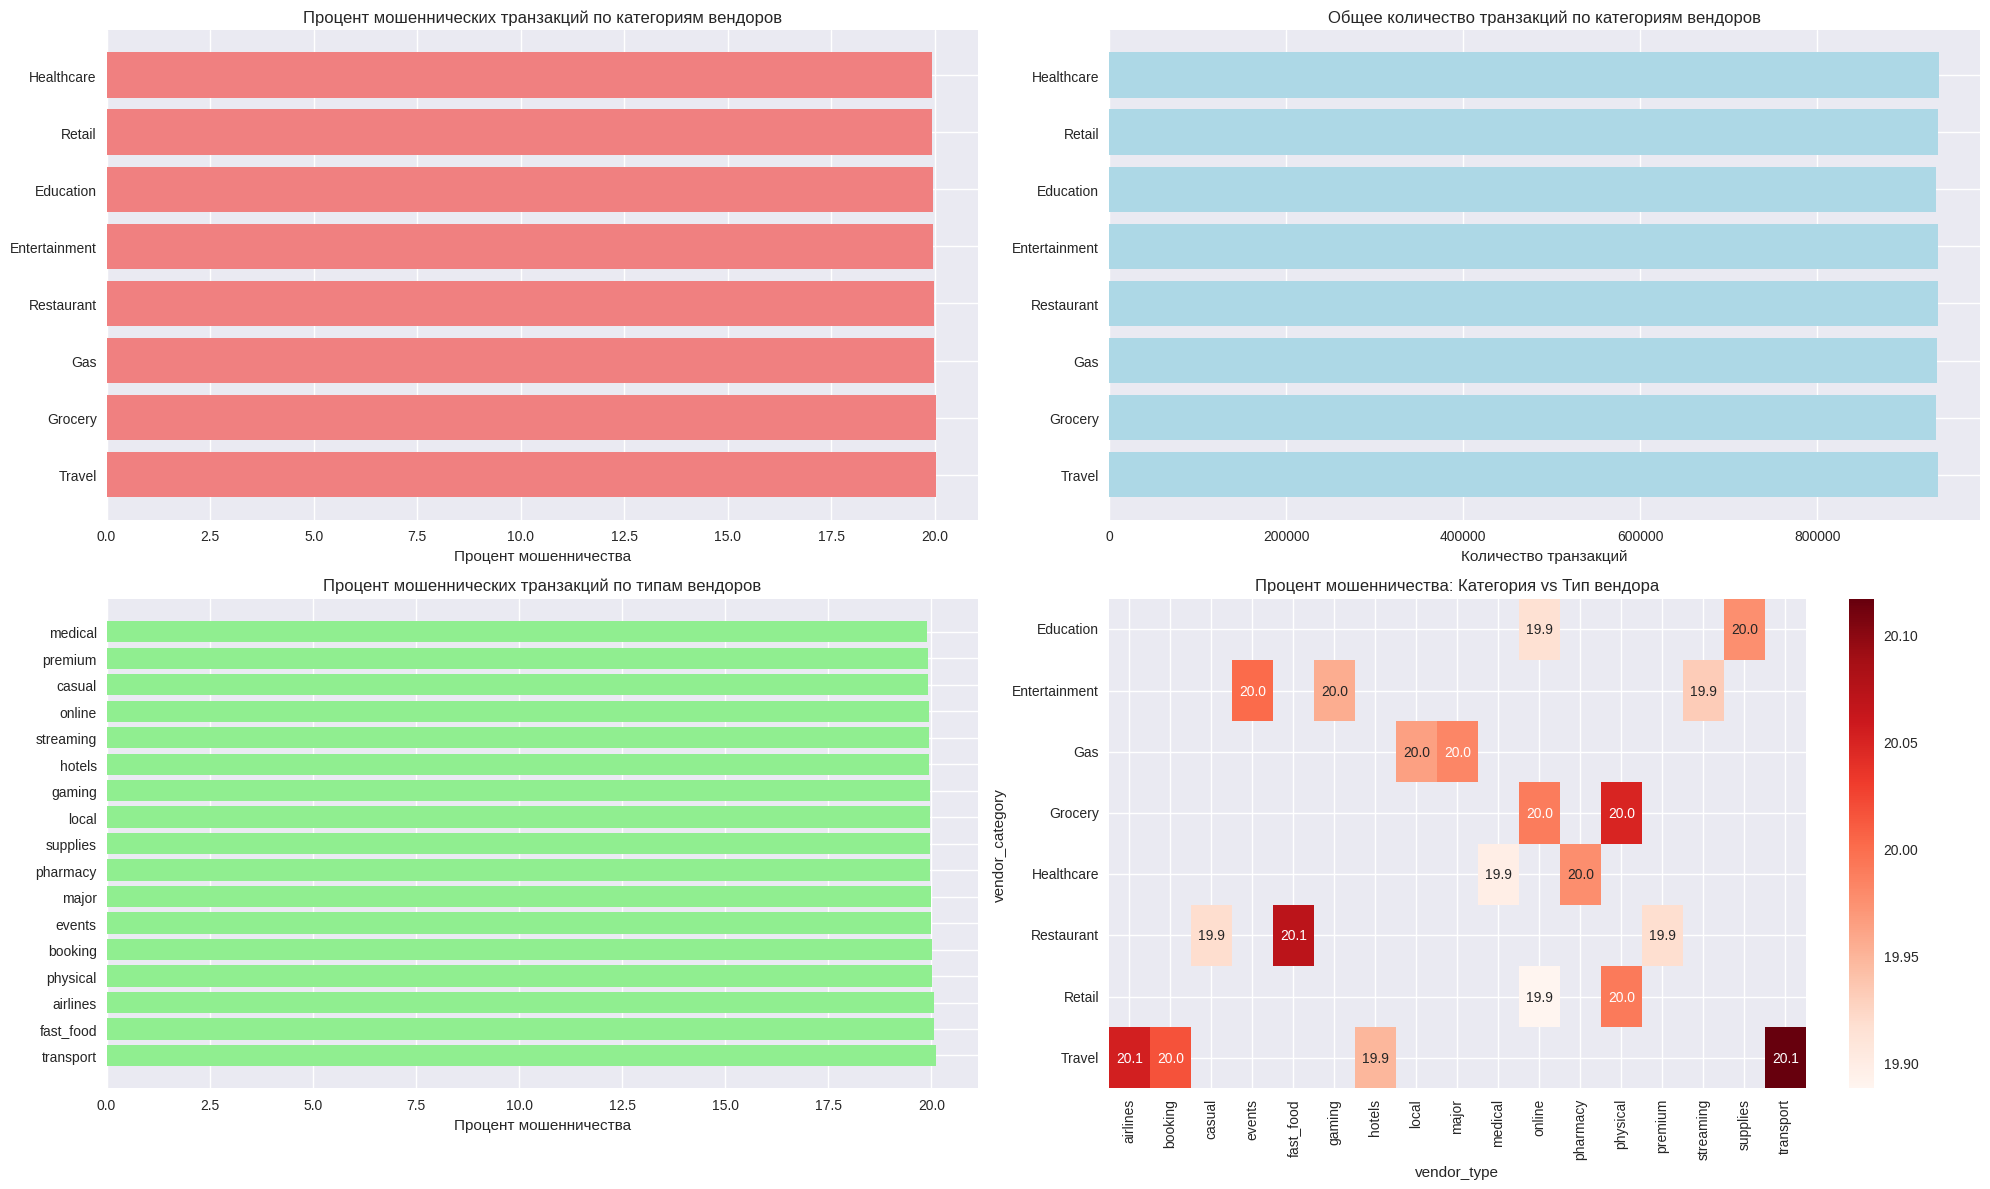

In [9]:
# Статистика по категориям
vendor_fraud = df_transactions.groupby('vendor_category')['is_fraud'].agg(['count', 'sum', 'mean'])
vendor_fraud.columns = ['Всего_транзакций', 'Мошеннических', 'Процент_мошенничества']
vendor_fraud['Процент_мошенничества'] = vendor_fraud['Процент_мошенничества'] * 100
vendor_fraud = vendor_fraud.sort_values('Процент_мошенничества', ascending=False)

print("Статистика мошенничества по категориям вендоров:")
print(vendor_fraud)

# Визуализация
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 12))

# Процент мошенничества по категориям
ax1.barh(vendor_fraud.index, vendor_fraud['Процент_мошенничества'], color='lightcoral')
ax1.set_title('Процент мошеннических транзакций по категориям вендоров')
ax1.set_xlabel('Процент мошенничества')

# Количество транзакций по категориям
ax2.barh(vendor_fraud.index, vendor_fraud['Всего_транзакций'], color='lightblue')
ax2.set_title('Общее количество транзакций по категориям вендоров')
ax2.set_xlabel('Количество транзакций')

# Анализ типов вендоров
vendor_type_fraud = df_transactions.groupby('vendor_type')['is_fraud'].agg(['count', 'sum', 'mean'])
vendor_type_fraud.columns = ['Всего_транзакций', 'Мошеннических', 'Процент_мошенничества']
vendor_type_fraud['Процент_мошенничества'] = vendor_type_fraud['Процент_мошенничества'] * 100
vendor_type_fraud = vendor_type_fraud.sort_values('Процент_мошенничества', ascending=False)

ax3.barh(vendor_type_fraud.index, vendor_type_fraud['Процент_мошенничества'], color='lightgreen')
ax3.set_title('Процент мошеннических транзакций по типам вендоров')
ax3.set_xlabel('Процент мошенничества')

# Тепловая карта категория vs тип
pivot_table = df_transactions.pivot_table(
    values='is_fraud', 
    index='vendor_category', 
    columns='vendor_type', 
    aggfunc='mean'
) * 100

sns.heatmap(pivot_table, annot=True, fmt='.1f', cmap='Reds', ax=ax4)
ax4.set_title('Процент мошенничества: Категория vs Тип вендора')

plt.tight_layout()
plt.show()

### Анализ географических данных


Топ-15 стран по проценту мошенничества:
           Всего_транзакций  Мошеннических  Процент_мошенничества
country                                                          
Mexico               785704         298841              38.034807
Russia               793730         299425              37.723785
Brazil               804800         298629              37.105989
Nigeria              849840         298600              35.136026
Australia            496695          37652               7.580507
USA                  500060          37312               7.461505
Japan                527393          37592               7.127891
Germany              524464          37205               7.093909
Canada               532632          37278               6.998828
UK                   538493          37345               6.935095
France               541287          37426               6.914262
Singapore            588668          37414               6.355705

Топ-15 городов по проценту мошеннич

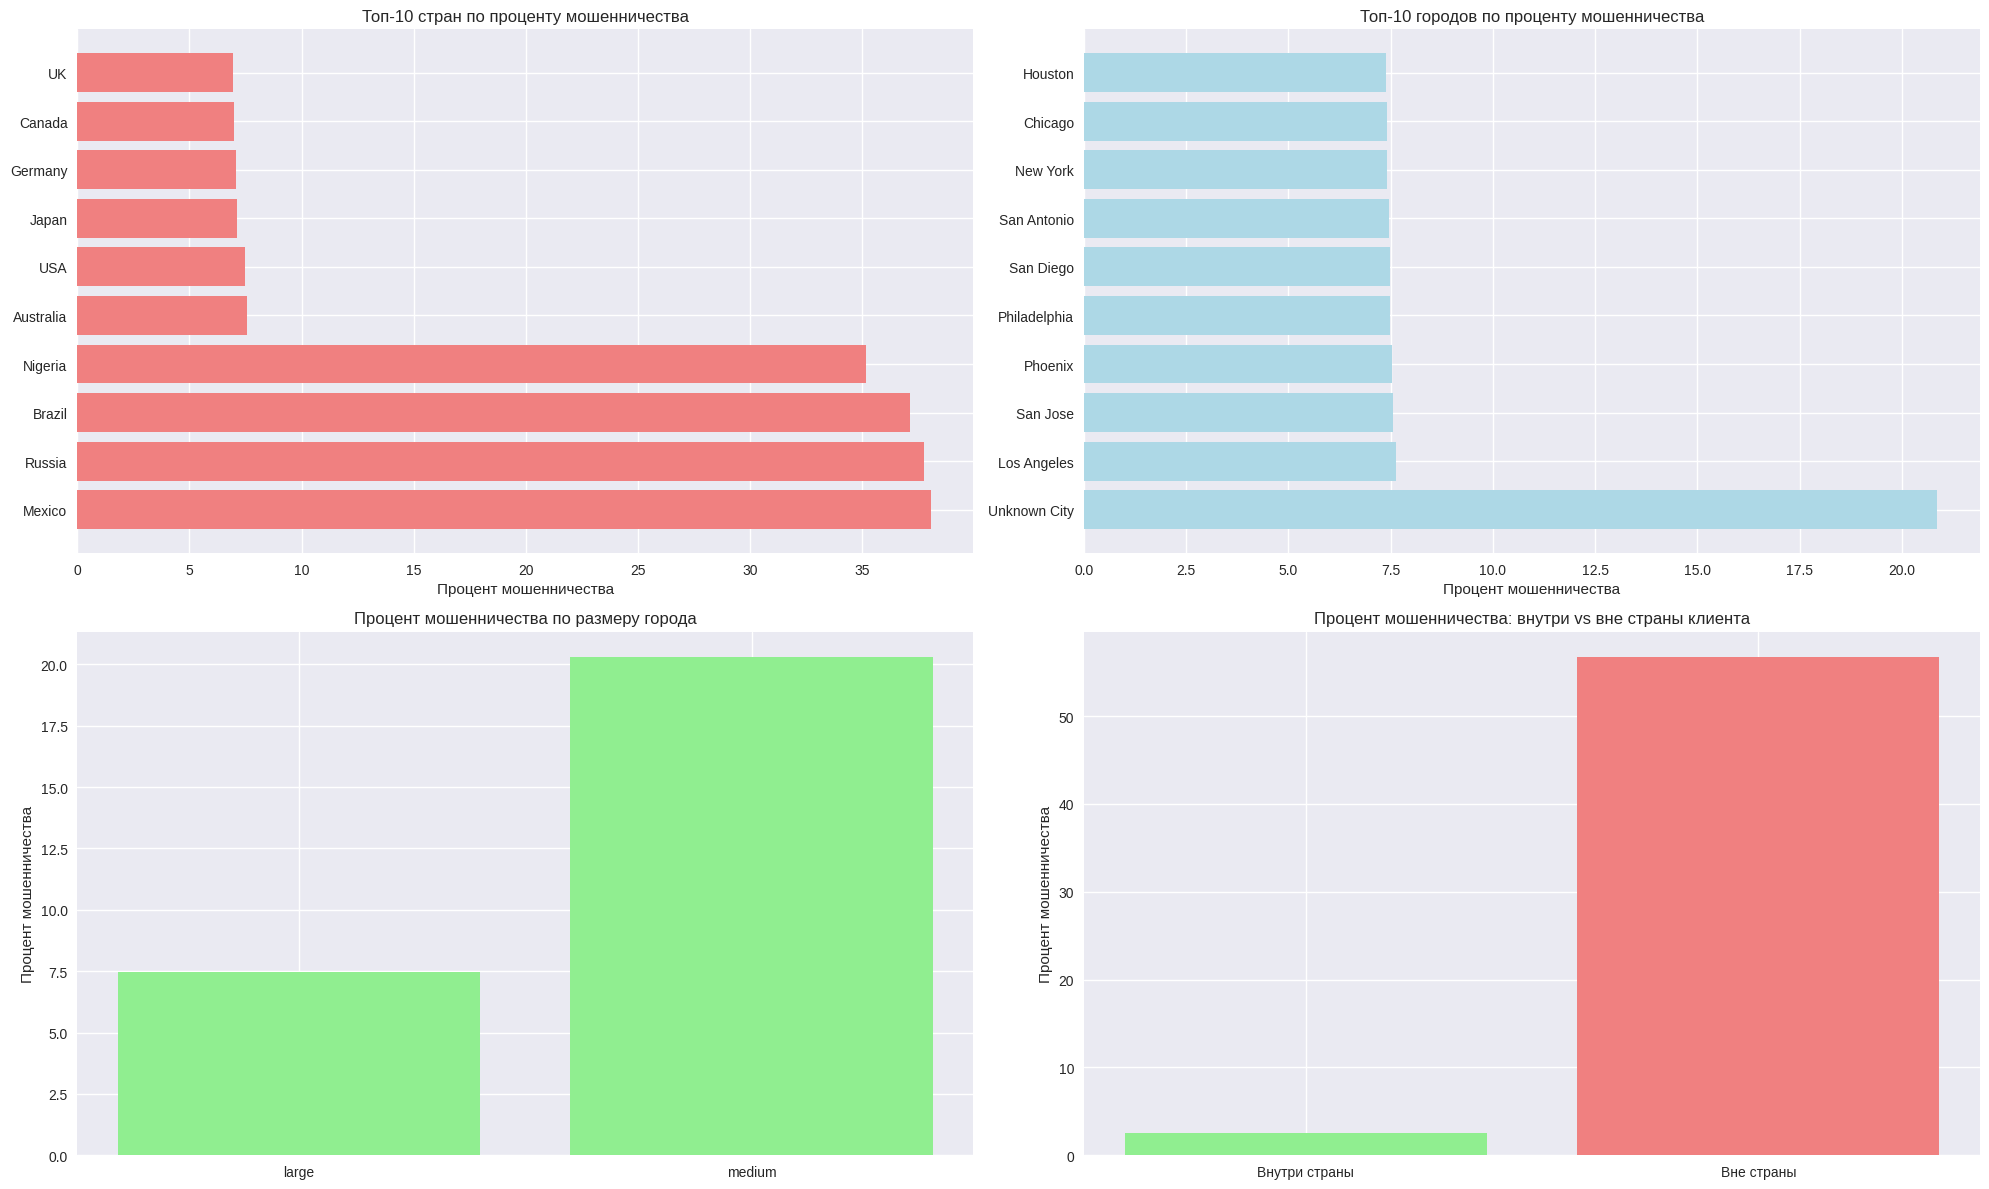

In [10]:
# Статистика по странам
country_fraud = df_transactions.groupby('country')['is_fraud'].agg(['count', 'sum', 'mean'])
country_fraud.columns = ['Всего_транзакций', 'Мошеннических', 'Процент_мошенничества']
country_fraud['Процент_мошенничества'] = country_fraud['Процент_мошенничества'] * 100
country_fraud = country_fraud.sort_values('Процент_мошенничества', ascending=False)

print("Топ-15 стран по проценту мошенничества:")
print(country_fraud.head(15))

# Статистика по городам
city_fraud = df_transactions.groupby('city')['is_fraud'].agg(['count', 'sum', 'mean'])
city_fraud.columns = ['Всего_транзакций', 'Мошеннических', 'Процент_мошенничества']
city_fraud['Процент_мошенничества'] = city_fraud['Процент_мошенничества'] * 100
city_fraud = city_fraud[city_fraud['Всего_транзакций'] >= 100]  # Минимум 100 транзакций
city_fraud = city_fraud.sort_values('Процент_мошенничества', ascending=False)

print("\nТоп-15 городов по проценту мошенничества (минимум 100 транзакций):")
print(city_fraud.head(15))

# Визуализация
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 12))

# Топ-10 стран по проценту мошенничества
top_countries = country_fraud.head(10)
ax1.barh(top_countries.index, top_countries['Процент_мошенничества'], color='lightcoral')
ax1.set_title('Топ-10 стран по проценту мошенничества')
ax1.set_xlabel('Процент мошенничества')

# Топ-10 городов по проценту мошенничества
top_cities = city_fraud.head(10)
ax2.barh(top_cities.index, top_cities['Процент_мошенничества'], color='lightblue')
ax2.set_title('Топ-10 городов по проценту мошенничества')
ax2.set_xlabel('Процент мошенничества')

# Анализ размеров городов
city_size_fraud = df_transactions.groupby('city_size')['is_fraud'].agg(['count', 'sum', 'mean'])
city_size_fraud.columns = ['Всего_транзакций', 'Мошеннических', 'Процент_мошенничества']
city_size_fraud['Процент_мошенничества'] = city_size_fraud['Процент_мошенничества'] * 100

ax3.bar(city_size_fraud.index, city_size_fraud['Процент_мошенничества'], color='lightgreen')
ax3.set_title('Процент мошенничества по размеру города')
ax3.set_ylabel('Процент мошенничества')

# Анализ операций вне страны клиента
outside_country_fraud = df_transactions.groupby('is_outside_home_country')['is_fraud'].agg(['count', 'sum', 'mean'])
outside_country_fraud.columns = ['Всего_транзакций', 'Мошеннических', 'Процент_мошенничества']
outside_country_fraud['Процент_мошенничества'] = outside_country_fraud['Процент_мошенничества'] * 100

ax4.bar(['Внутри страны', 'Вне страны'], outside_country_fraud['Процент_мошенничества'], 
        color=['lightgreen', 'lightcoral'])
ax4.set_title('Процент мошенничества: внутри vs вне страны клиента')
ax4.set_ylabel('Процент мошенничества')

plt.tight_layout()
plt.show()

### Способы совершения мошенничества в разрезе устройств и каналов


Статистика мошенничества по устройствам (минимум 100 транзакций):
                 Всего_транзакций  Мошеннических  Процент_мошенничества
device                                                                 
Chip Reader                217324         217324             100.000000
Magnetic Stripe            217204         217204             100.000000
NFC Payment                216519         216519             100.000000
Firefox                   1120952         142171              12.683059
Safari                    1120245         141379              12.620364
Android App               1126117         140844              12.507049
Chrome                    1132384         140087              12.370980
iOS App                   1143461         140306              12.270292
Edge                      1189560         138885              11.675325

Статистика мошенничества по каналам:
         Всего_транзакций  Мошеннических  Процент_мошенничества
channel                                 

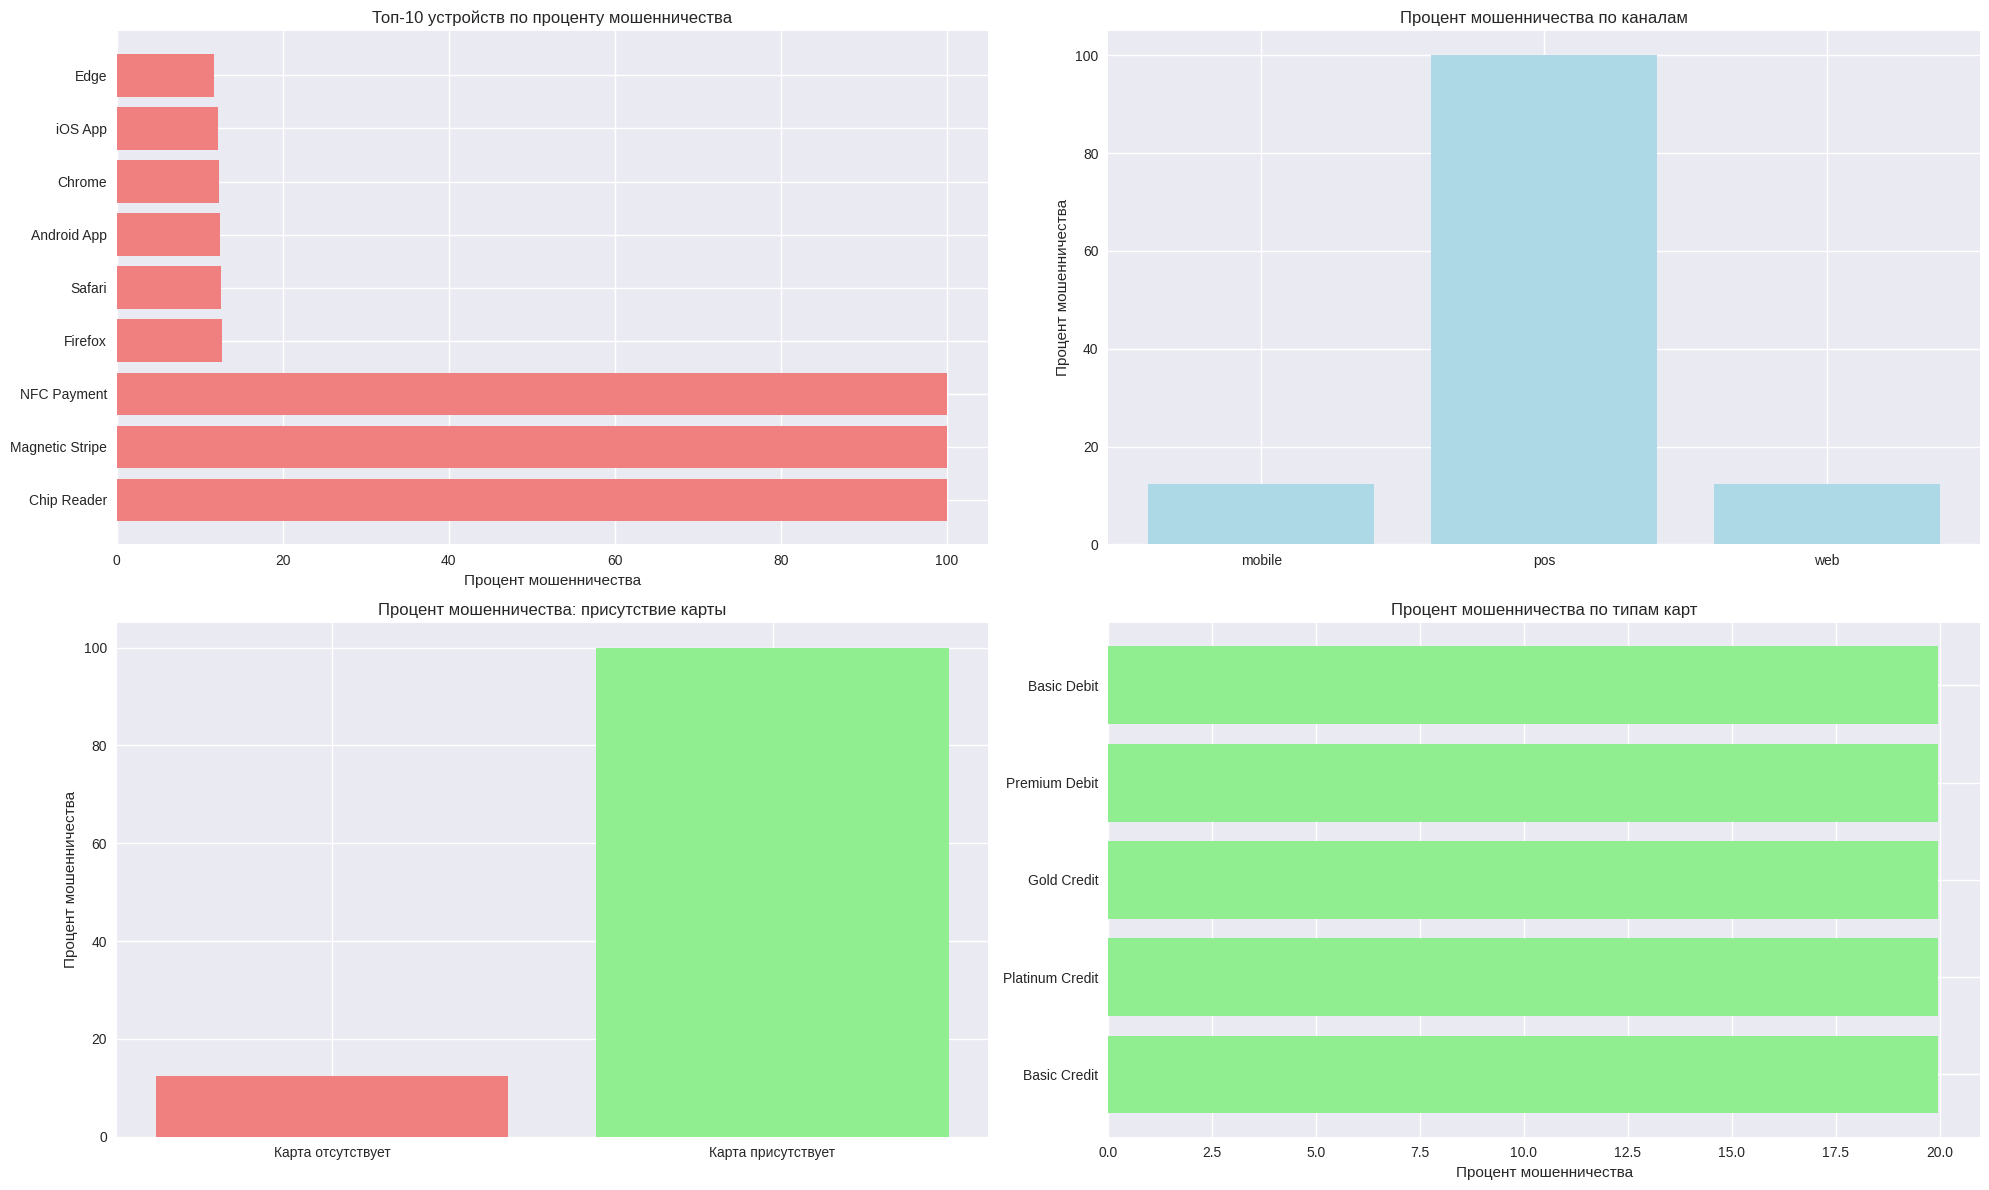

In [11]:
# Статистика по устройствам
device_fraud = df_transactions.groupby('device')['is_fraud'].agg(['count', 'sum', 'mean'])
device_fraud.columns = ['Всего_транзакций', 'Мошеннических', 'Процент_мошенничества']
device_fraud['Процент_мошенничества'] = device_fraud['Процент_мошенничества'] * 100
device_fraud = device_fraud[device_fraud['Всего_транзакций'] >= 100]
device_fraud = device_fraud.sort_values('Процент_мошенничества', ascending=False)

print("Статистика мошенничества по устройствам (минимум 100 транзакций):")
print(device_fraud)

# Статистика по каналам
channel_fraud = df_transactions.groupby('channel')['is_fraud'].agg(['count', 'sum', 'mean'])
channel_fraud.columns = ['Всего_транзакций', 'Мошеннических', 'Процент_мошенничества']
channel_fraud['Процент_мошенничества'] = channel_fraud['Процент_мошенничества'] * 100

print("\nСтатистика мошенничества по каналам:")
print(channel_fraud)

# Визуализация
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 12))

# Топ-10 устройств по проценту мошенничества
top_devices = device_fraud.head(10)
ax1.barh(top_devices.index, top_devices['Процент_мошенничества'], color='lightcoral')
ax1.set_title('Топ-10 устройств по проценту мошенничества')
ax1.set_xlabel('Процент мошенничества')

# Процент мошенничества по каналам
ax2.bar(channel_fraud.index, channel_fraud['Процент_мошенничества'], color='lightblue')
ax2.set_title('Процент мошенничества по каналам')
ax2.set_ylabel('Процент мошенничества')

# Анализ присутствия карты
card_present_fraud = df_transactions.groupby('is_card_present')['is_fraud'].agg(['count', 'sum', 'mean'])
card_present_fraud.columns = ['Всего_транзакций', 'Мошеннических', 'Процент_мошенничества']
card_present_fraud['Процент_мошенничества'] = card_present_fraud['Процент_мошенничества'] * 100

ax3.bar(['Карта отсутствует', 'Карта присутствует'], card_present_fraud['Процент_мошенничества'], 
        color=['lightcoral', 'lightgreen'])
ax3.set_title('Процент мошенничества: присутствие карты')
ax3.set_ylabel('Процент мошенничества')

# Анализ типов карт
card_type_fraud = df_transactions.groupby('card_type')['is_fraud'].agg(['count', 'sum', 'mean'])
card_type_fraud.columns = ['Всего_транзакций', 'Мошеннических', 'Процент_мошенничества']
card_type_fraud['Процент_мошенничества'] = card_type_fraud['Процент_мошенничества'] * 100
card_type_fraud = card_type_fraud.sort_values('Процент_мошенничества', ascending=False)

ax4.barh(card_type_fraud.index, card_type_fraud['Процент_мошенничества'], color='lightgreen')
ax4.set_title('Процент мошенничества по типам карт')
ax4.set_xlabel('Процент мошенничества')

plt.tight_layout()
plt.show()

### Анализ активности за последний час


Статистика показателей активности за последний час:
       num_transactions  total_amount  unique_merchants  unique_countries  \
count      7.483766e+06  7.483766e+06      7.483766e+06      7.483766e+06   
mean       4.091429e+02  1.991719e+07      8.002226e+01      1.066260e+01   
std        3.910964e+02  3.565890e+07      3.047287e+01      2.617777e+00   
min        0.000000e+00  1.454232e-02      0.000000e+00      0.000000e+00   
25%        1.050000e+02  3.367823e+06      6.300000e+01      1.100000e+01   
50%        2.920000e+02  1.017851e+07      9.500000e+01      1.200000e+01   
75%        6.060000e+02  2.273432e+07      1.040000e+02      1.200000e+01   
max        3.962000e+03  1.072915e+09      1.050000e+02      1.200000e+01   

       max_single_amount  
count       7.483766e+06  
mean        1.726432e+06  
std         1.398325e+06  
min         1.454232e-02  
25%         8.015712e+05  
50%         1.235738e+06  
75%         2.290742e+06  
max         6.253153e+06  

Корреляция

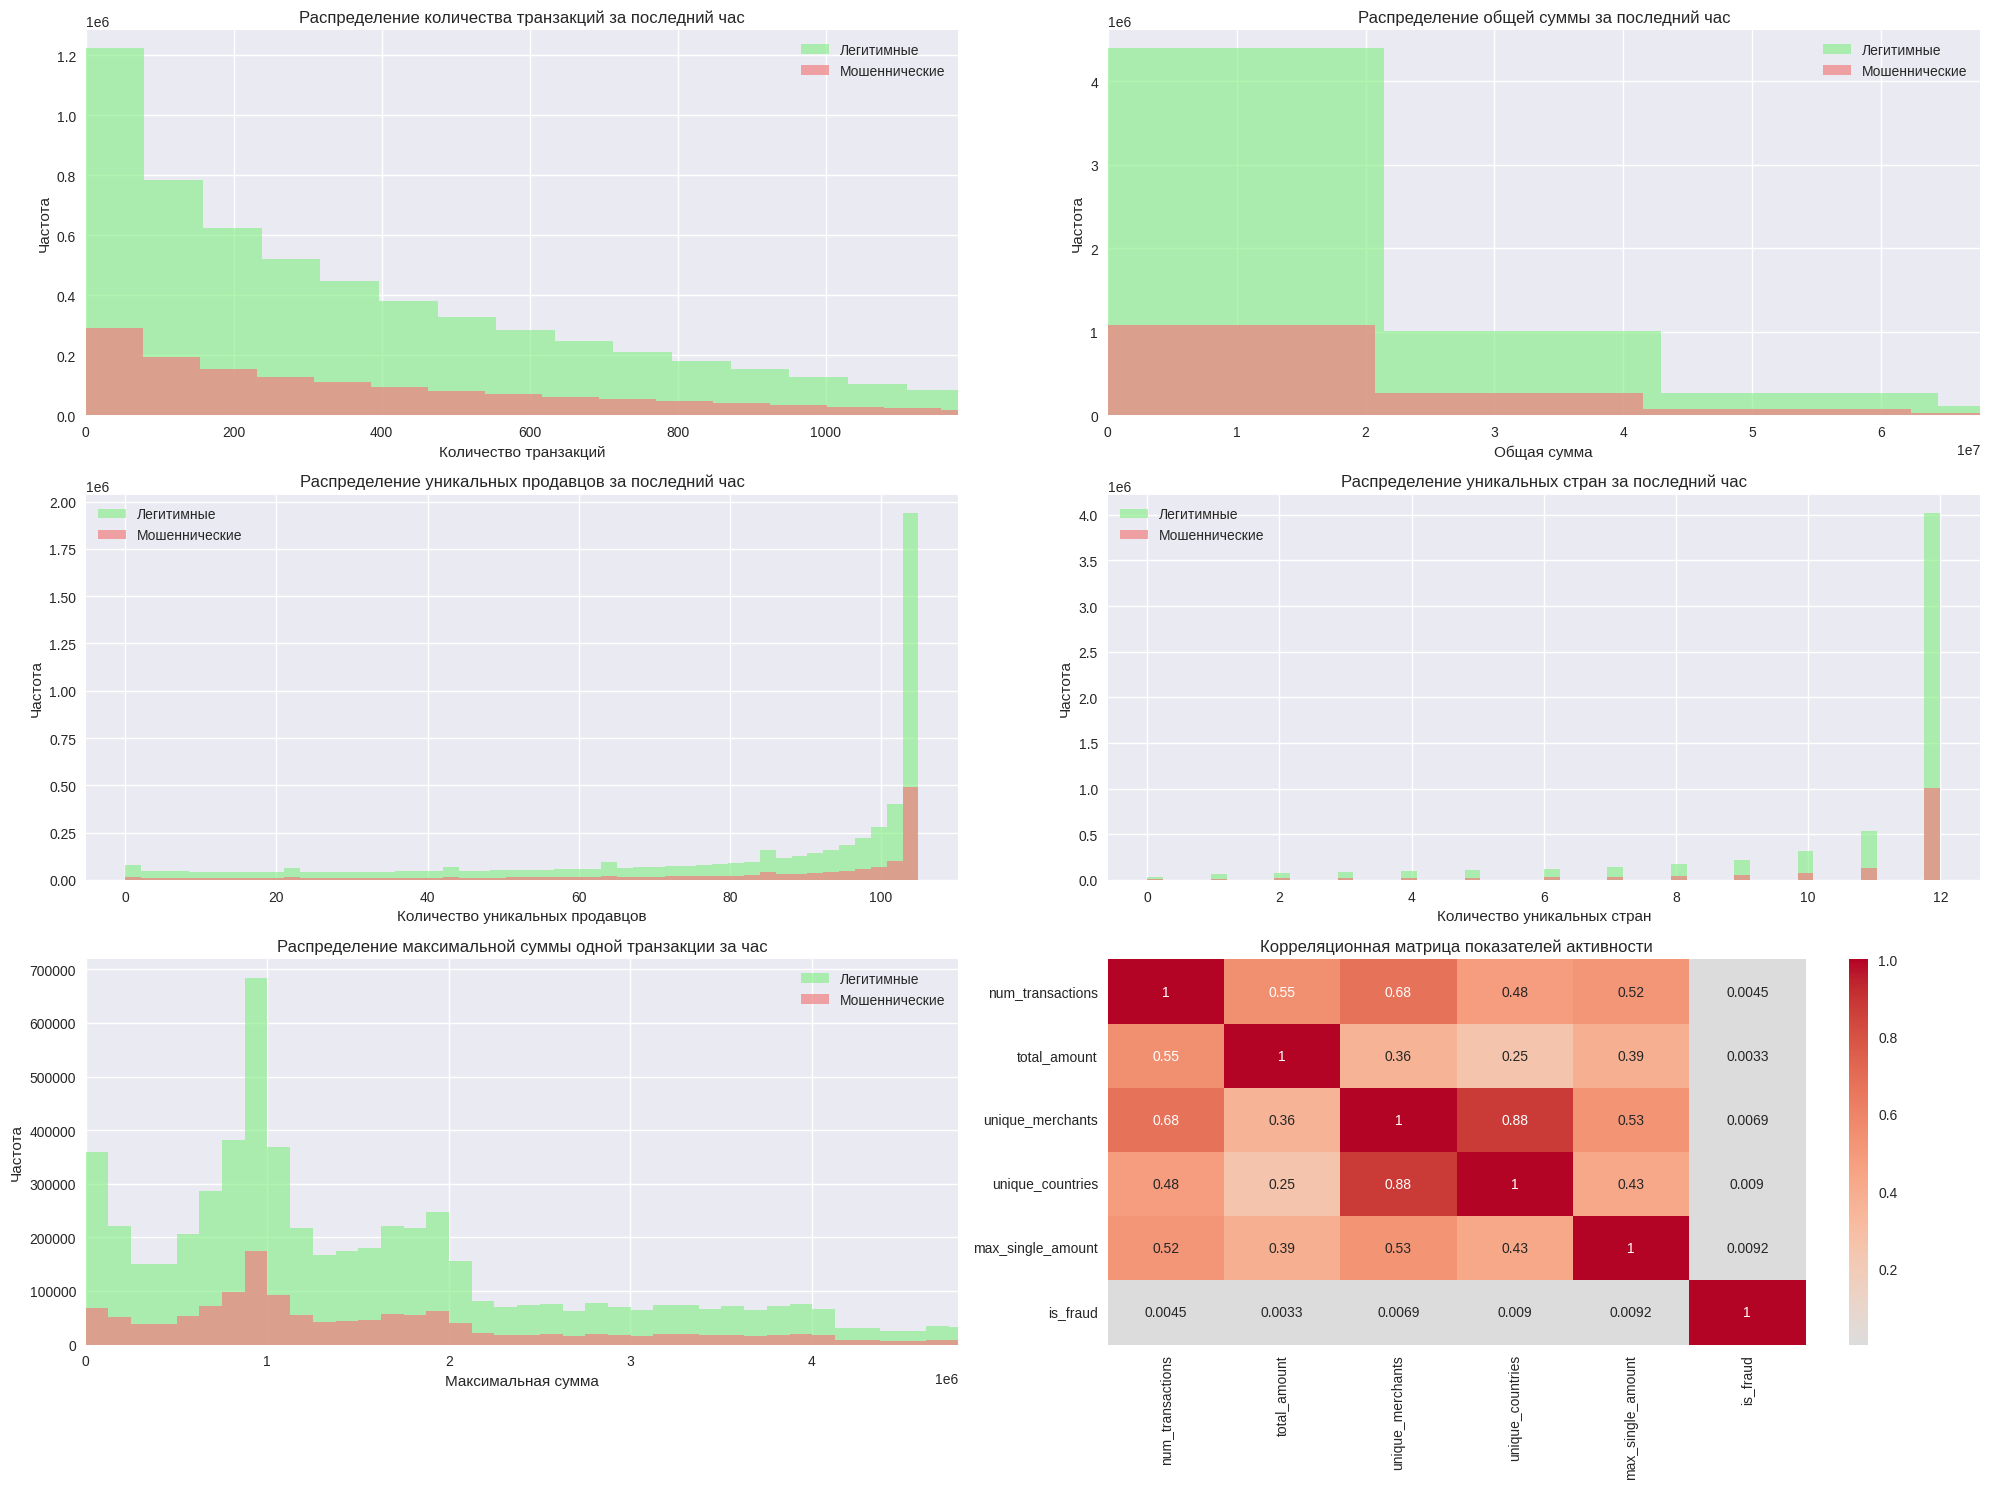

In [15]:
# Извлечение данных из структурированного поля
last_hour_data = df_transactions['last_hour_activity'].apply(pd.Series)
df_transactions = pd.concat([df_transactions, last_hour_data], axis=1)

# Статистика по показателям активности
activity_features = ['num_transactions', 'total_amount', 'unique_merchants', 'unique_countries', 'max_single_amount']

print("Статистика показателей активности за последний час:")
print(df_transactions[activity_features].describe())

# Корреляция с мошенничеством
correlations = df_transactions[activity_features + ['is_fraud']].corr()['is_fraud'].sort_values(ascending=False)
print("\nКорреляция показателей активности с мошенничеством:")
print(correlations)

# Визуализация
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(20, 15))

# Распределение количества транзакций за час
ax1.hist(df_transactions[df_transactions['is_fraud'] == False]['num_transactions'], 
         bins=50, alpha=0.7, label='Легитимные', color='lightgreen')
ax1.hist(df_transactions[df_transactions['is_fraud'] == True]['num_transactions'], 
         bins=50, alpha=0.7, label='Мошеннические', color='lightcoral')
ax1.set_title('Распределение количества транзакций за последний час')
ax1.set_xlabel('Количество транзакций')
ax1.set_ylabel('Частота')
ax1.legend()
ax1.set_xlim(0, df_transactions['num_transactions'].quantile(0.95))

# Распределение общей суммы за час
ax2.hist(df_transactions[df_transactions['is_fraud'] == False]['total_amount'], 
         bins=50, alpha=0.7, label='Легитимные', color='lightgreen')
ax2.hist(df_transactions[df_transactions['is_fraud'] == True]['total_amount'], 
         bins=50, alpha=0.7, label='Мошеннические', color='lightcoral')
ax2.set_title('Распределение общей суммы за последний час')
ax2.set_xlabel('Общая сумма')
ax2.set_ylabel('Частота')
ax2.legend()
ax2.set_xlim(0, df_transactions['total_amount'].quantile(0.95))

# Распределение уникальных продавцов
ax3.hist(df_transactions[df_transactions['is_fraud'] == False]['unique_merchants'], 
         bins=50, alpha=0.7, label='Легитимные', color='lightgreen')
ax3.hist(df_transactions[df_transactions['is_fraud'] == True]['unique_merchants'], 
         bins=50, alpha=0.7, label='Мошеннические', color='lightcoral')
ax3.set_title('Распределение уникальных продавцов за последний час')
ax3.set_xlabel('Количество уникальных продавцов')
ax3.set_ylabel('Частота')
ax3.legend()

# Распределение уникальных стран
ax4.hist(df_transactions[df_transactions['is_fraud'] == False]['unique_countries'], 
         bins=50, alpha=0.7, label='Легитимные', color='lightgreen')
ax4.hist(df_transactions[df_transactions['is_fraud'] == True]['unique_countries'], 
         bins=50, alpha=0.7, label='Мошеннические', color='lightcoral')
ax4.set_title('Распределение уникальных стран за последний час')
ax4.set_xlabel('Количество уникальных стран')
ax4.set_ylabel('Частота')
ax4.legend()

# Распределение максимальной суммы одной транзакции
ax5.hist(df_transactions[df_transactions['is_fraud'] == False]['max_single_amount'], 
         bins=50, alpha=0.7, label='Легитимные', color='lightgreen')
ax5.hist(df_transactions[df_transactions['is_fraud'] == True]['max_single_amount'], 
         bins=50, alpha=0.7, label='Мошеннические', color='lightcoral')
ax5.set_title('Распределение максимальной суммы одной транзакции за час')
ax5.set_xlabel('Максимальная сумма')
ax5.set_ylabel('Частота')
ax5.legend()
ax5.set_xlim(0, df_transactions['max_single_amount'].quantile(0.95))

# Корреляционная матрица
corr_matrix = df_transactions[activity_features + ['is_fraud']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, ax=ax6)
ax6.set_title('Корреляционная матрица показателей активности')

plt.tight_layout()
plt.show()

### Мошенничество в разрезе валют


Статистика мошенничества по валютам:
          Всего_транзакций  Мошеннических  Процент_мошенничества
currency                                                        
MXN                 785704         298841              38.034807
RUB                 793730         299425              37.723785
BRL                 804800         298629              37.105989
NGN                 849840         298600              35.136026
AUD                 496695          37652               7.580507
USD                 500060          37312               7.461505
JPY                 527393          37592               7.127891
EUR                1065751          74631               7.002668
CAD                 532632          37278               6.998828
GBP                 538493          37345               6.935095
SGD                 588668          37414               6.355705

Статистика обменных курсов:
             AUD        BRL        CAD        EUR        GBP         JPY  \
count  31.000

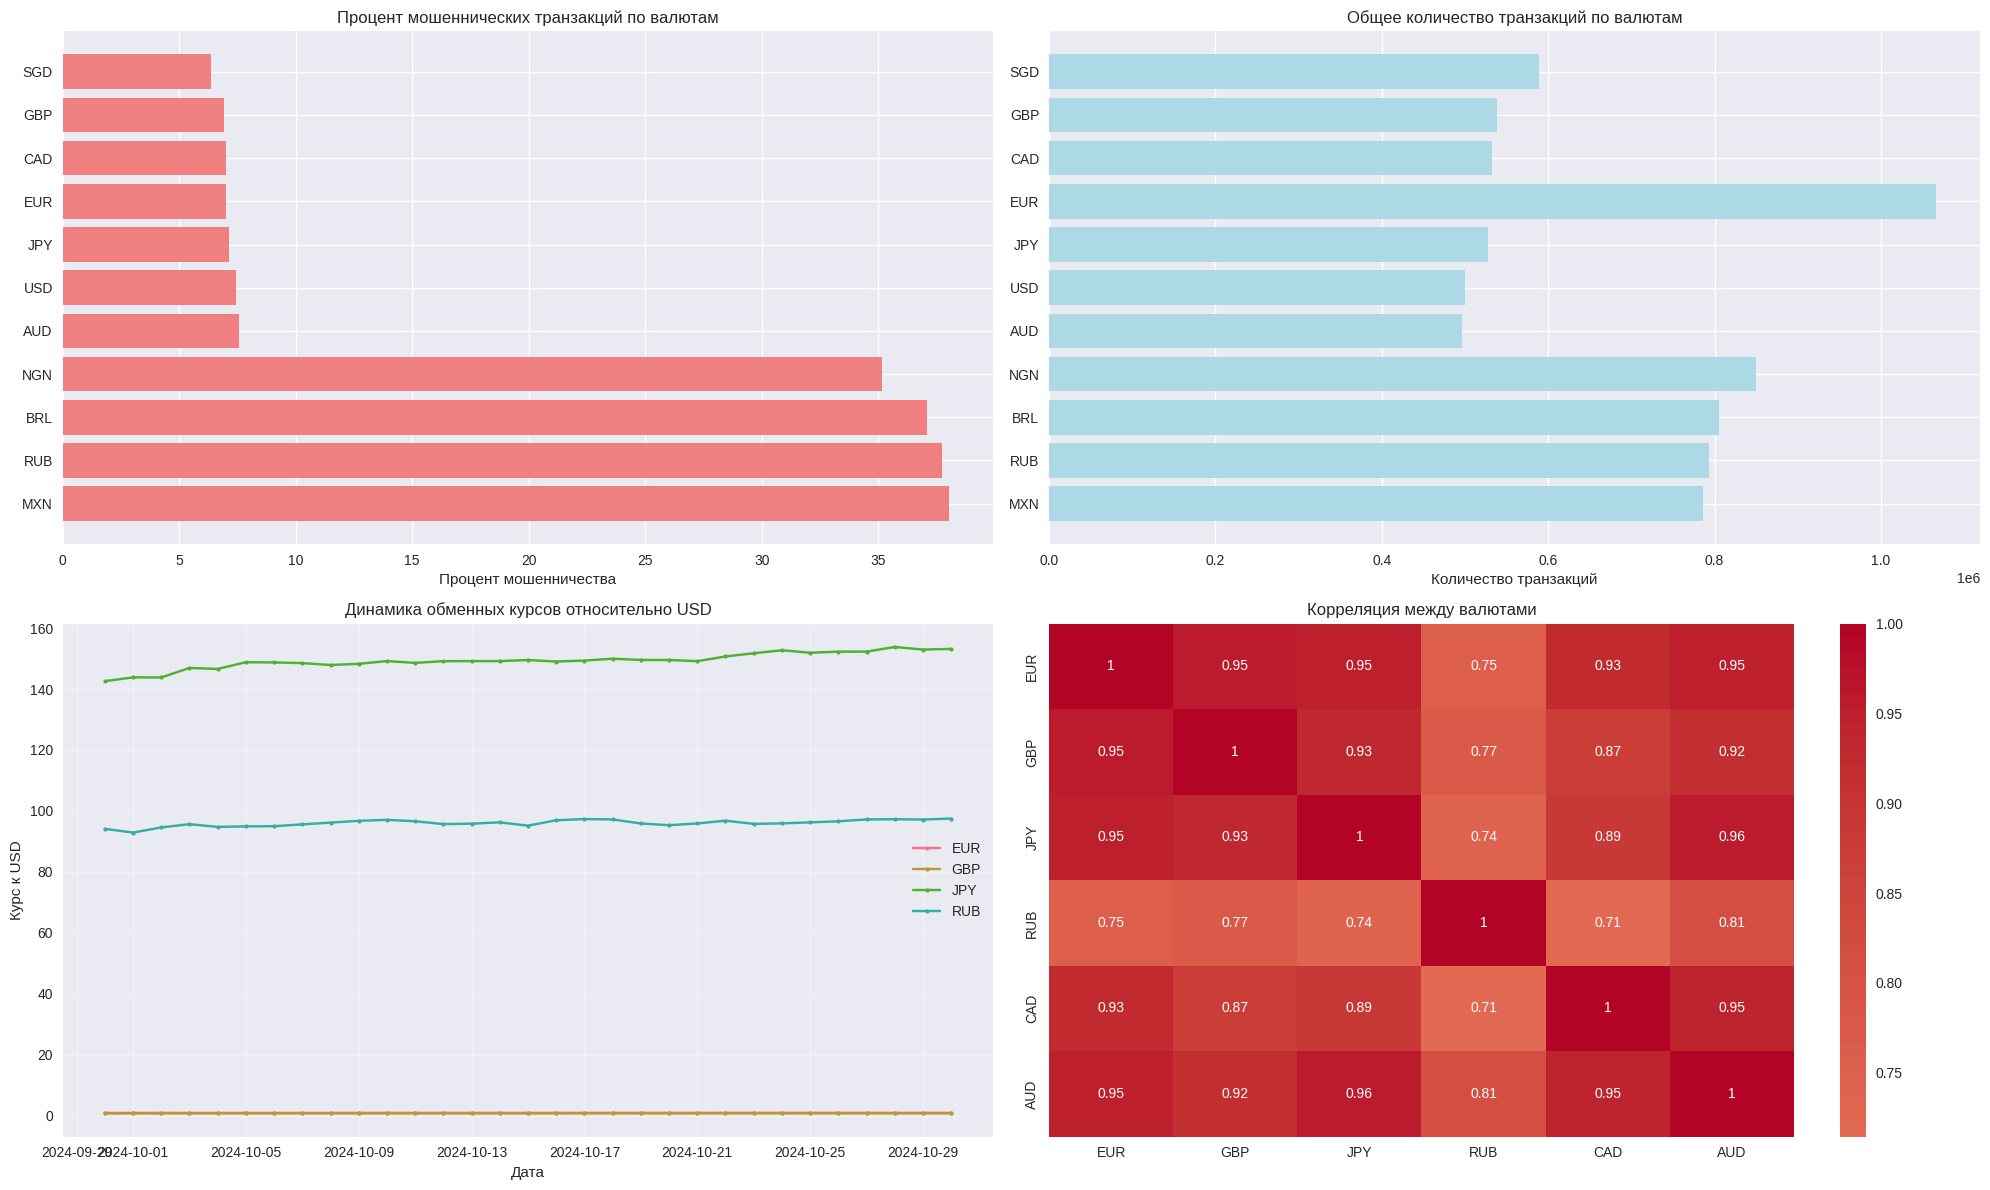

In [12]:
# Статистика по валютам
currency_fraud = df_transactions.groupby('currency')['is_fraud'].agg(['count', 'sum', 'mean'])
currency_fraud.columns = ['Всего_транзакций', 'Мошеннических', 'Процент_мошенничества']
currency_fraud['Процент_мошенничества'] = currency_fraud['Процент_мошенничества'] * 100
currency_fraud = currency_fraud.sort_values('Процент_мошенничества', ascending=False)

print("Статистика мошенничества по валютам:")
print(currency_fraud)

# Анализ обменных курсов
print("\nСтатистика обменных курсов:")
print(df_exchange.describe())

# Визуализация
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 12))

# Процент мошенничества по валютам
ax1.barh(currency_fraud.index, currency_fraud['Процент_мошенничества'], color='lightcoral')
ax1.set_title('Процент мошеннических транзакций по валютам')
ax1.set_xlabel('Процент мошенничества')

# Количество транзакций по валютам
ax2.barh(currency_fraud.index, currency_fraud['Всего_транзакций'], color='lightblue')
ax2.set_title('Общее количество транзакций по валютам')
ax2.set_xlabel('Количество транзакций')

# Динамика обменных курсов (выбираем несколько валют)
currencies_to_plot = ['EUR', 'GBP', 'JPY', 'RUB']
for currency in currencies_to_plot:
    if currency in df_exchange.columns:
        ax3.plot(df_exchange['date'], df_exchange[currency], label=currency, marker='o', markersize=3)
ax3.set_title('Динамика обменных курсов относительно USD')
ax3.set_xlabel('Дата')
ax3.set_ylabel('Курс к USD')
ax3.legend()
ax3.grid(True, alpha=0.3)

# Корреляция между валютами
currency_corr = df_exchange[['EUR', 'GBP', 'JPY', 'RUB', 'CAD', 'AUD']].corr()
sns.heatmap(currency_corr, annot=True, cmap='coolwarm', center=0, ax=ax4)
ax4.set_title('Корреляция между валютами')

plt.tight_layout()
plt.show()

### Мошенничество в выходные дни


Статистика мошенничества по выходным дням:
            Всего_транзакций  Мошеннических  Процент_мошенничества
is_weekend                                                        
False                5554103        1109277              19.972208
True                 1929663         385442              19.974576

Статистика мошенничества по рискованным вендорам:
                     Всего_транзакций  Мошеннических  Процент_мошенничества
is_high_risk_vendor                                                        
False                         5611803        1120352              19.964208
True                          1871963         374367              19.998632


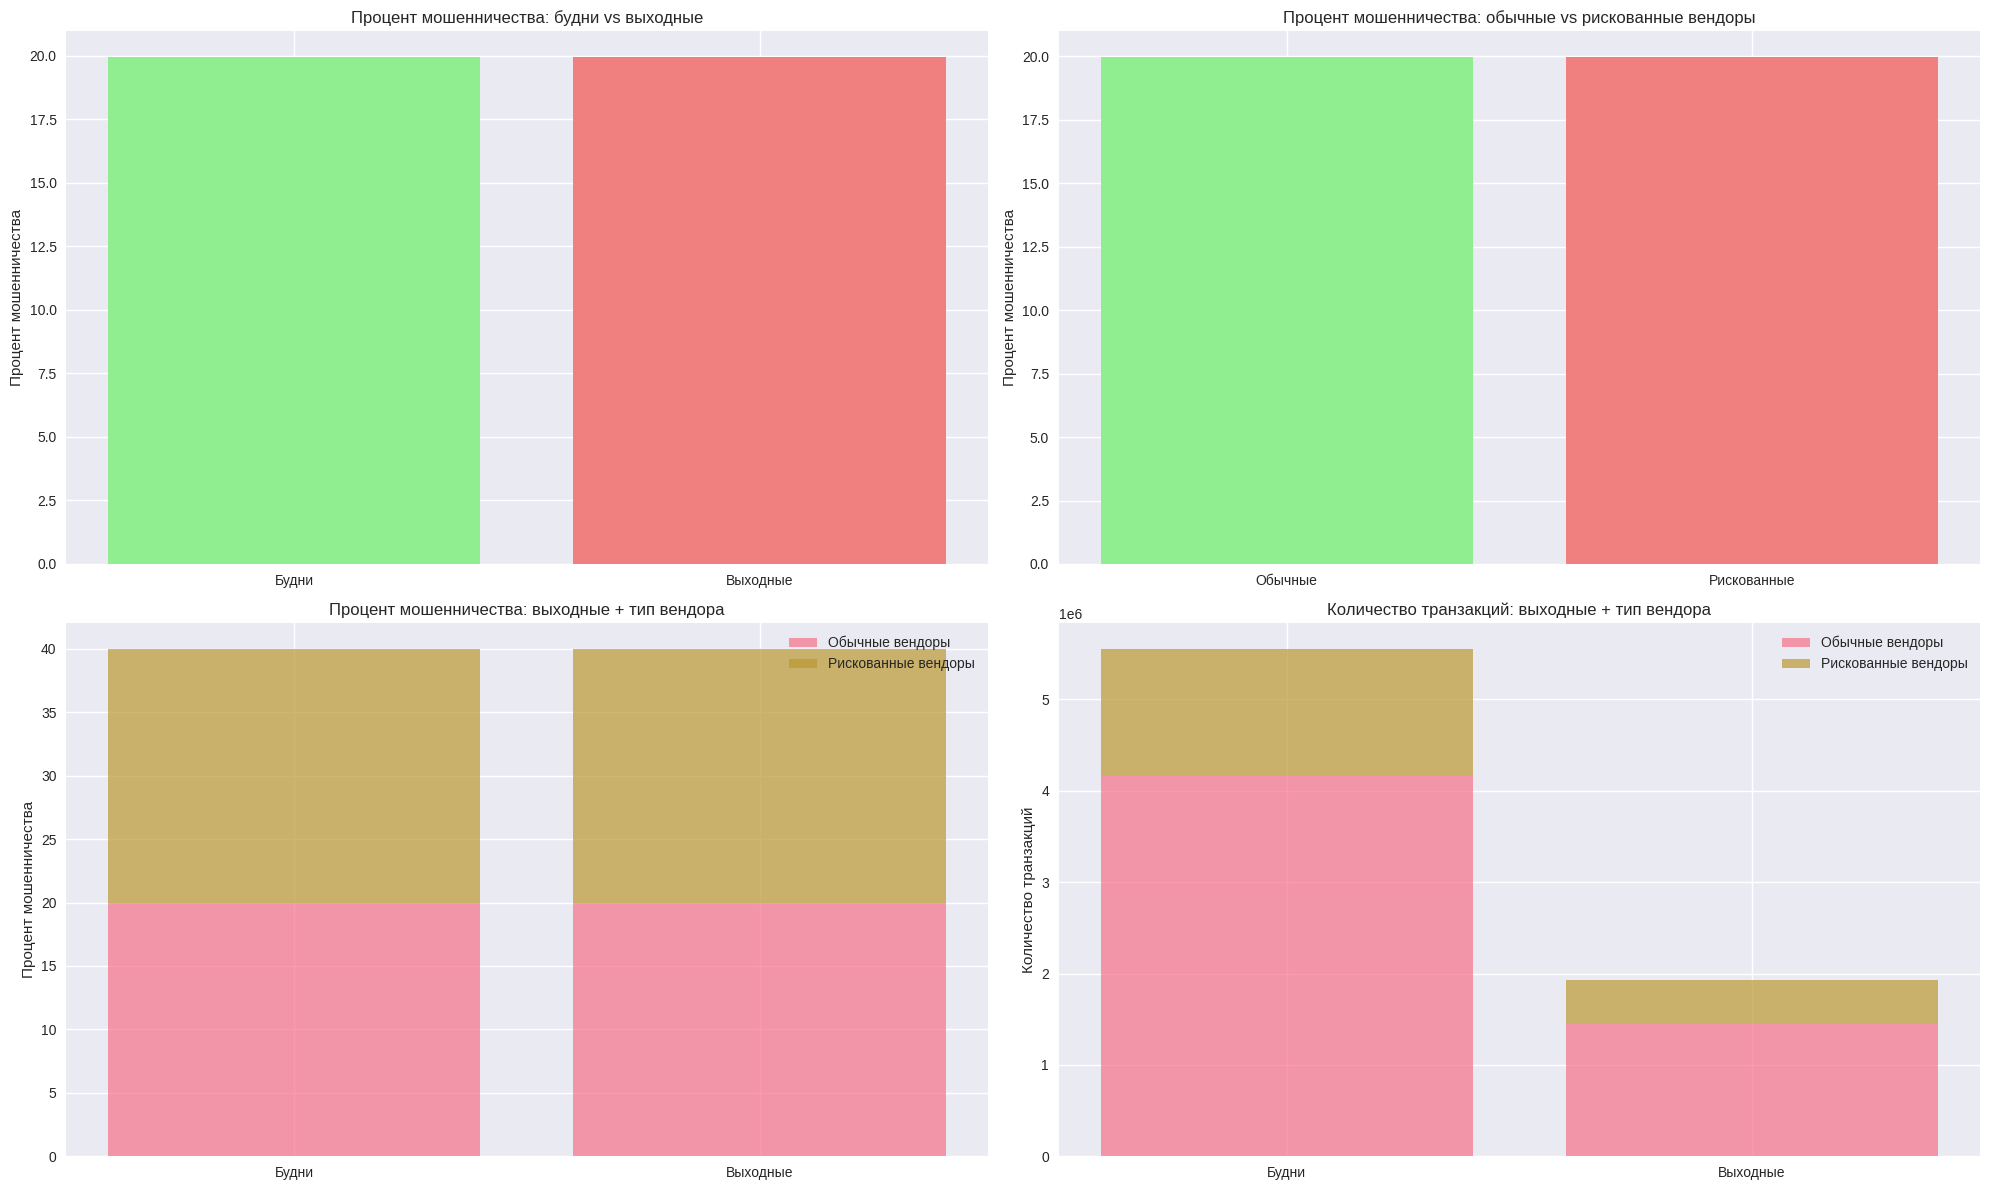

In [13]:
weekend_fraud = df_transactions.groupby('is_weekend')['is_fraud'].agg(['count', 'sum', 'mean'])
weekend_fraud.columns = ['Всего_транзакций', 'Мошеннических', 'Процент_мошенничества']
weekend_fraud['Процент_мошенничества'] = weekend_fraud['Процент_мошенничества'] * 100

print("Статистика мошенничества по выходным дням:")
print(weekend_fraud)

# Анализ рискованных вендоров
risk_vendor_fraud = df_transactions.groupby('is_high_risk_vendor')['is_fraud'].agg(['count', 'sum', 'mean'])
risk_vendor_fraud.columns = ['Всего_транзакций', 'Мошеннических', 'Процент_мошенничества']
risk_vendor_fraud['Процент_мошенничества'] = risk_vendor_fraud['Процент_мошенничества'] * 100

print("\nСтатистика мошенничества по рискованным вендорам:")
print(risk_vendor_fraud)

# Визуализация
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 12))

# Выходные дни
ax1.bar(['Будни', 'Выходные'], weekend_fraud['Процент_мошенничества'], 
        color=['lightgreen', 'lightcoral'])
ax1.set_title('Процент мошенничества: будни vs выходные')
ax1.set_ylabel('Процент мошенничества')

# Рискованные вендоры
ax2.bar(['Обычные', 'Рискованные'], risk_vendor_fraud['Процент_мошенничества'], 
        color=['lightgreen', 'lightcoral'])
ax2.set_title('Процент мошенничества: обычные vs рискованные вендоры')
ax2.set_ylabel('Процент мошенничества')

# Комбинация выходных и рискованных вендоров
weekend_risk_fraud = df_transactions.groupby(['is_weekend', 'is_high_risk_vendor'])['is_fraud'].mean() * 100
weekend_risk_fraud = weekend_risk_fraud.unstack()

ax3.bar(['Будни', 'Выходные'], weekend_risk_fraud[False], label='Обычные вендоры', alpha=0.7)
ax3.bar(['Будни', 'Выходные'], weekend_risk_fraud[True], bottom=weekend_risk_fraud[False], 
        label='Рискованные вендоры', alpha=0.7)
ax3.set_title('Процент мошенничества: выходные + тип вендора')
ax3.set_ylabel('Процент мошенничества')
ax3.legend()

# Количество транзакций по комбинации
weekend_risk_count = df_transactions.groupby(['is_weekend', 'is_high_risk_vendor']).size().unstack()
ax4.bar(['Будни', 'Выходные'], weekend_risk_count[False], label='Обычные вендоры', alpha=0.7)
ax4.bar(['Будни', 'Выходные'], weekend_risk_count[True], bottom=weekend_risk_count[False], 
        label='Рискованные вендоры', alpha=0.7)
ax4.set_title('Количество транзакций: выходные + тип вендора')
ax4.set_ylabel('Количество транзакций')
ax4.legend()

plt.tight_layout()
plt.show()

### Корреляционный анализ


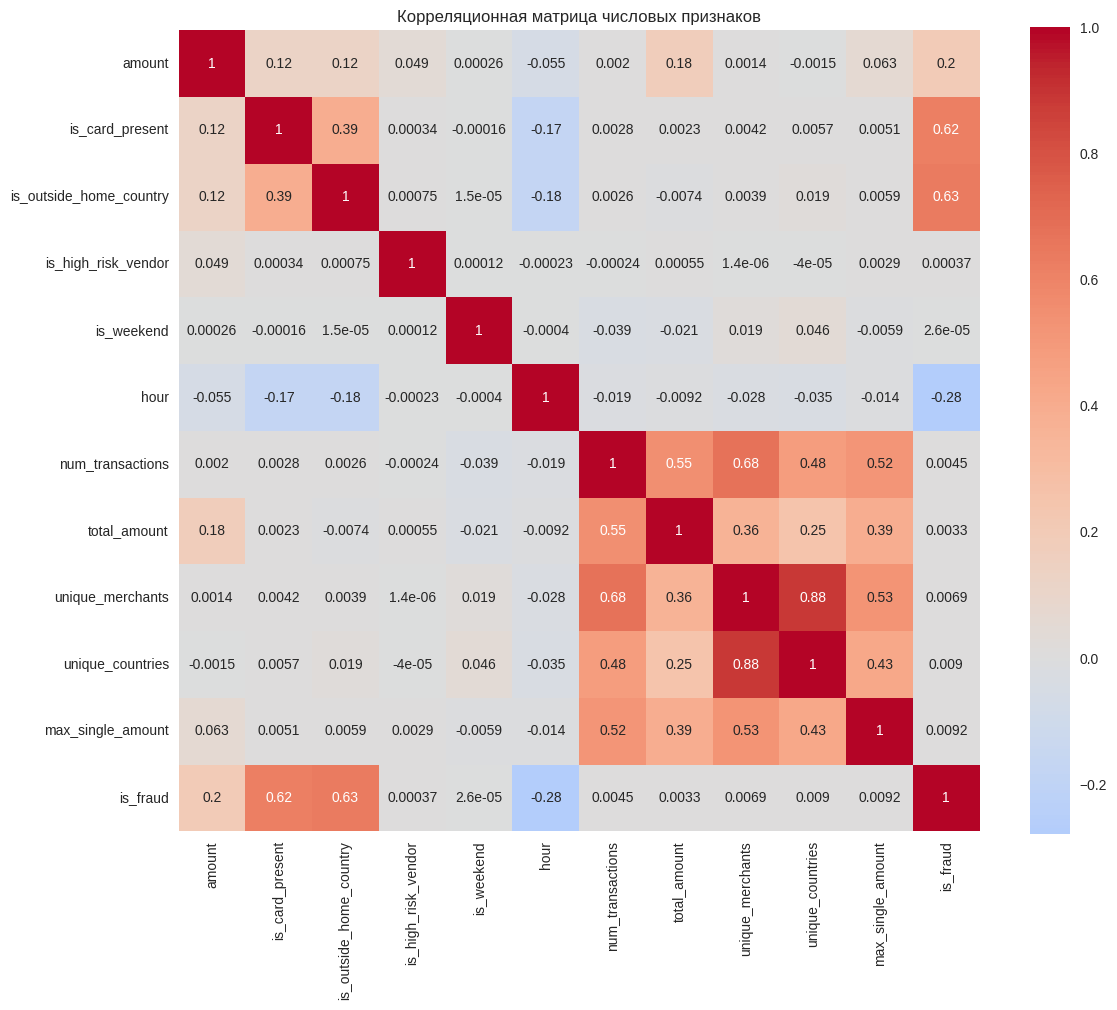

Топ-10 признаков по корреляции с мошенничеством:
is_fraud                   1.000000
is_outside_home_country    0.634459
is_card_present            0.617886
hour                       0.279624
amount                     0.199342
max_single_amount          0.009226
unique_countries           0.009046
unique_merchants           0.006932
num_transactions           0.004506
total_amount               0.003332
Name: is_fraud, dtype: float64


In [16]:
# Подготовка данных для корреляционного анализа
correlation_features = [
    'amount', 'is_card_present', 'is_outside_home_country', 
    'is_high_risk_vendor', 'is_weekend', 'hour',
    'num_transactions', 'total_amount', 'unique_merchants', 
    'unique_countries', 'max_single_amount', 'is_fraud'
]

# Создание корреляционной матрицы
corr_matrix = df_transactions[correlation_features].corr()

# Визуализация
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, square=True)
plt.title('Корреляционная матрица числовых признаков')
plt.tight_layout()
plt.show()

# Топ корреляций с целевой переменной
correlations_with_fraud = corr_matrix['is_fraud'].abs().sort_values(ascending=False)
print("Топ-10 признаков по корреляции с мошенничеством:")
print(correlations_with_fraud.head(10))

### Продуктовые и технические гипотезы


#### Продуктовые гипотезы


1. **Географические паттерны мошенничества**

   - Гипотеза: Мошенничество чаще происходит в определенных странах ( Mexico, Russia, Brazil, Nigeria) и больших городах
   - Ценность: Фокус на высокорисковых регионах, персонализация проверок в больших городах, особое внимание когда клиенты вне своих стран

2. **Временные паттерны активности**

   - Гипотеза: Мошеннические транзакции имеют специфические временные паттерны:в ночное время, в начале недели, небольше и очень большие суммы
   - Ценность: Улучшение алгоритмов в реальном времени, оптимизация ресурсов (распределение на ночное время и начало недели)

3. **Поведенческие паттерны клиентов**

   - Гипотеза: Аномальная активность за короткий период указывает на мошенничество
   - Ценность: Раннее выявление, улучшение пользовательского опыта

4. **Устройства и каналы**
   - Гипотеза: Определенные устройства и каналы более уязвимы для мошенничества:
     - Chip Reader, Magnetic Stripe, NFC Payment
     - pos-терминалы
     - кредитные карты
   - Ценность: Улучшение безопасности, фокус на проблемных каналах


#### Технические гипотезы


1. **Feature Engineering**

   - Создание новых признаков на основе временных паттернов и корреляций
   - логарифмирование сумм транзакций позволит нормализовать распределение
   - Агрегация транзакций по клиентам и временным окнам
   - Нормализация сумм по валютам

2. **Моделирование**

   - Использование ансамблевых методов (Random Forest, XGBoost, LightGBM, CatBoost)
   - Применение методов для несбалансированных данных (Random Oversampling / SMOTE / Undersampling, Class Weighting, Random Forest с балансировкой)
   - Использование метрик, устойчивых к дисбалансу:
     - Precision, Recall, F1-Score
     - ROC-AUC, PR-AUC
   - Временные модели (LSTM, GRU) для последовательностей транзакций

3. **Оптимизация**

   - Балансировка классов (SMOTE, undersampling)
   - Подбор порогов классификации
   - Кросс-валидация с временными разбиениями

4. **Мониторинг**
   - A/B тестирование новых алгоритмов
   - Мониторинг drift'а данных
   - Автоматическое обновление моделей


#### Бизнес ценность


1. **Снижение потерь**: Уменьшение финансовых потерь от мошенничества
2. **Улучшение UX**: Снижение количества ложных срабатываний
3. **Оптимизация ресурсов**: Фокус на высокорисковых транзакциях
4. **Конкурентное преимущество**: Более безопасная платформа
5. **Соответствие регуляторным требованиям**: Улучшение compliance
